In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bestSelling_games.csv")

In [6]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_date"] = df["release_date"].dt.strftime("%d/%m/%y")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
 15  release_year         2380 non-null   i

In [12]:
df.describe()

reviews_like_rate  all_reviews_number        price  age_restriction  \
count        2380.000000        2.380000e+03  2380.000000      2380.000000   
mean           82.413445        3.161508e+04    10.509130        10.605462   
std            12.643745        2.137197e+05    11.344576         6.395752   
min            20.000000        1.000000e+01     0.000000         0.000000   
25%            76.000000        3.420000e+02     2.990000        10.000000   
50%            85.000000        2.106500e+03     7.990000        13.000000   
75%            92.000000        1.303000e+04    12.490000        17.000000   
max           100.000000        8.803754e+06    79.990000        17.000000   

            rating   difficulty       length  estimated_downloads  \
count  2380.000000  2380.000000  2380.000000         2.380000e+03   
mean      3.228017     2.864706    22.965126         2.523007e+06   
std       0.771203     0.975194    21.247556         1.118283e+07   
min       0.390000     1.000000     1.000000         9.000000e+01   
25%       2.750000     2.000000     6.000000         3.500000e+04   
50%       3.380000     3.000000    16.000000         2.171500e+05   
75%       3.810000     3.000000    34.000000         1.380000e+06   
max       4.830000     5.000000    80.000000         3.061700e+08   

       release_year  
count   2380.000000  
mean    2020.386555  
std        4.809195  
min     1994.000000  
25%     2018.000000  
50%     2022.000000  
75%     2024.000000  
max     2025.000000

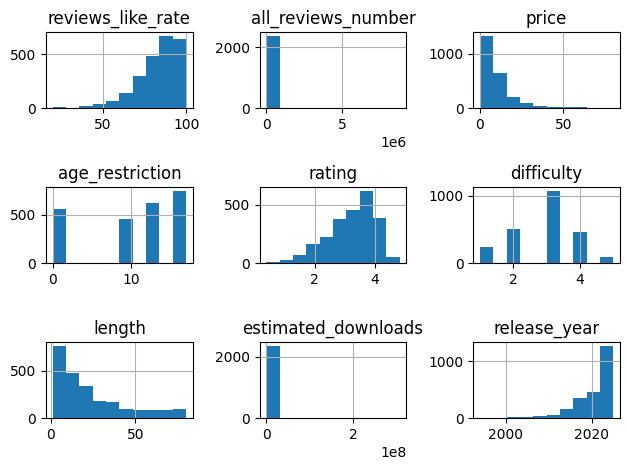

In [9]:
df.hist()
plt.tight_layout()

In [10]:
df.isnull().sum()

game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
release_year           0
dtype: int64

In [26]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_date"] = df["release_date"].dt.strftime("%d/%m/%y")

In [13]:
user_defined_tags = df["user_defined_tags"].str.split(",").explode()

In [14]:
user_defined_tags

0                   FPS
0                Action
0              Tactical
1              Survival
1               Shooter
             ...       
2377         Simulation
2378         Platformer
2378                 2D
2379             Action
2379     Pixel Graphics
Name: user_defined_tags, Length: 7497, dtype: object

In [15]:
user_defined_tags.value_counts()

user_defined_tags
 Simulation    475
 Action        424
 RPG           336
 Adventure     327
Action         306
              ... 
Realistic        2
 Adventure       1
 FPS             1
                 1
2.5D             1
Name: count, Length: 88, dtype: int64

In [16]:
df_with_price = user_defined_tags.to_frame('tags').join(df[["price","rating"]])

In [17]:
df_with_price

tags  price  rating
0                 FPS   0.00    3.20
0              Action   0.00    3.20
0            Tactical   0.00    3.20
1            Survival   0.00    3.10
1             Shooter   0.00    3.10
...               ...    ...     ...
2377       Simulation   2.99    3.61
2378       Platformer   1.35    3.00
2378               2D   1.35    3.00
2379           Action   0.89    4.17
2379   Pixel Graphics   0.89    4.17

[7497 rows x 3 columns]

In [20]:
df_with_price.groupby('tags')["price"].describe()

count       mean        std    min     25%    50%    75%    max
tags                                                                         
                3.0  14.323333   6.027714   7.99  11.490  14.99  17.49  19.99
                1.0  29.990000        NaN  29.99  29.990  29.99  29.99  29.99
 2.5D          15.0  11.491333  12.142253   1.00   4.390   9.89  11.74  49.99
 2D           266.0   6.637707   6.186863   0.00   1.990   5.79   9.29  44.99
 Action       424.0  12.655047  13.136215   0.00   3.990   8.99  14.99  69.99
...             ...        ...        ...    ...     ...    ...    ...    ...
Survival       46.0  11.839130  10.449852   0.00   3.240  10.49  17.99  59.99
Tactical       12.0  12.981667   6.632353   5.79   8.965  12.24  14.99  28.99
Turn-Based     29.0  20.408276  20.768070   0.00   7.990  12.49  26.99  79.99
Visual Novel   33.0   6.847273   5.055664   0.00   1.990   7.29   9.29  19.99
War             9.0   9.613333   6.078478   0.00   6.590   7.99  10.49  19.99

[88 rows x 8 columns]

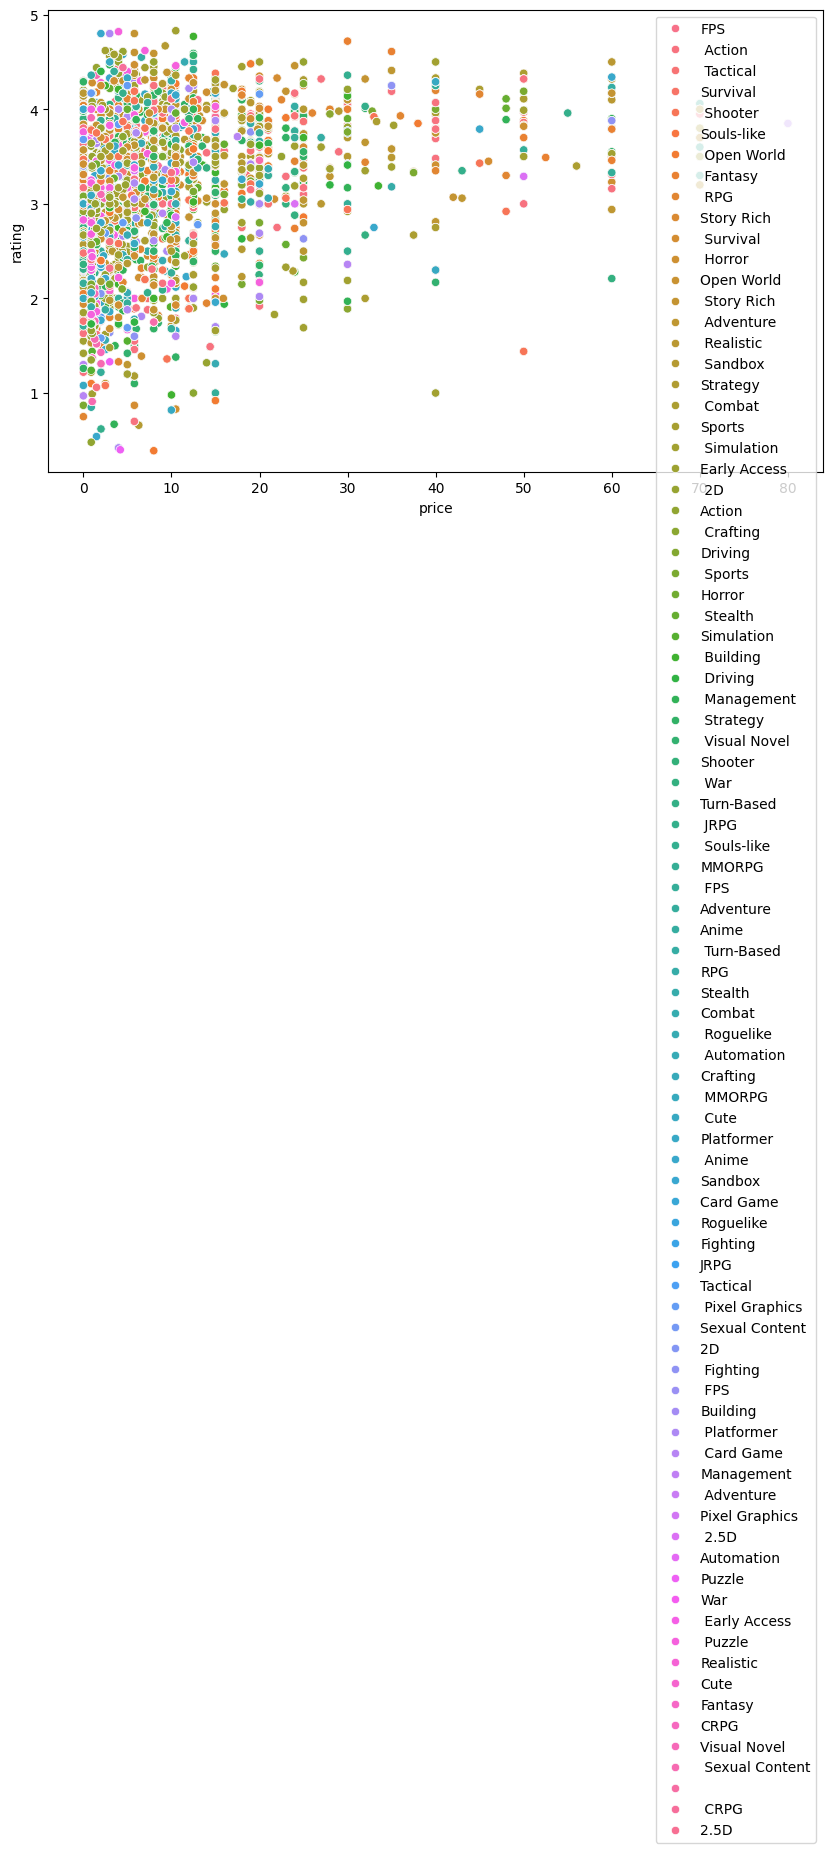

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_with_price, x ="price", y="rating",hue="tags")
plt.legend(loc="upper right", bbox_to_anchor=(1,1))

In [27]:
price_trend = df.groupby("release_year")["price"].mean().sort_index(ascending=True)
price_trend

release_year
1994     2.990000
1995     6.990000
1996     5.990000
1997     3.590000
1998     4.815000
1999     5.990000
2000     3.940000
2001     2.990000
2002     5.250000
2003     4.223333
2004     6.940000
2005     7.947143
2006     7.882308
2007     8.413333
2008     7.823000
2009    10.320000
2010    10.874615
2011    10.130556
2012     8.693600
2013    10.137027
2014     8.322439
2015    11.178667
2016    11.418739
2017     8.943273
2018    11.338984
2019     9.954574
2020    11.138903
2021    11.556176
2022    13.263333
2023    10.924505
2024     9.943582
2025     9.894613
Name: price, dtype: float64

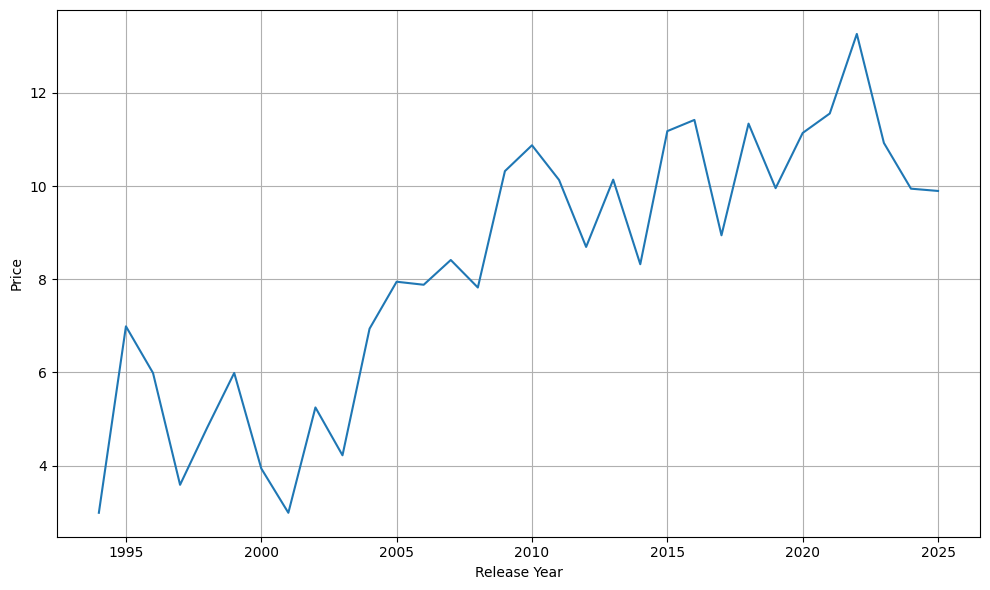

In [30]:
plt.figure(figsize=(10,6))
plt.plot(price_trend.index,price_trend.values)
plt.xlabel("Release Year")
plt.ylabel("Price")
plt.tight_layout()
plt.grid(True)
plt.show()

In [31]:
other_features = df["other_features"].str.split(",").explode()
other_features

0       Cross-Platform Multiplayer
0              Steam Trading Cards
0                   Steam Workshop
0                 In-App Purchases
0                            Stats
                   ...            
2378         Includes level editor
2378                Family Sharing
2379                 Single-player
2379            Steam Achievements
2379                Family Sharing
Name: other_features, Length: 11982, dtype: object

In [41]:
other_features = other_features.to_frame('features')

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [33]:
other_features['features']  = other_features['features'].apply(lambda x: x.strip())

In [35]:
other_features['features'].value_counts()

features
Single-player                 2206
Family Sharing                2136
Steam Achievements            1780
Steam Cloud                   1325
Steam Trading Cards            843
Online Co-op                   516
Online PvP                     459
Steam Workshop                 230
Steam Leaderboards             230
In-App Purchases               224
Remote Play on TV              222
Remote Play Together           216
Cross-Platform Multiplayer     210
Remote Play on Tablet          189
Stats                          154
Includes level editor          138
Remote Play on Phone           126
Shared/Split Screen Co-op      124
Shared/Split Screen PvP        115
MMO                             98
Captions available              88
LAN Co-op                       62
HDR available                   59
LAN PvP                         58
Tracked Controller Support      57
VR Only                         41
VR Supported                    35
Commentary available            15
Steam Timel

In [47]:
unique_features = other_features['features'].unique()
unique_features

array(['Cross-Platform Multiplayer', 'Steam Trading Cards',
       'Steam Workshop', 'In-App Purchases', 'Stats',
       'Remote Play on Phone', 'Remote Play on Tablet',
       'Remote Play on TV', 'Steam Timeline', 'Online PvP',
       'Single-player', 'Online Co-op', 'Steam Achievements',
       'Steam Cloud', 'Family Sharing', 'SteamVR Collectibles',
       'Shared/Split Screen PvP', 'Shared/Split Screen Co-op',
       'Remote Play Together', 'HDR available', 'MMO', 'LAN PvP',
       'LAN Co-op', 'VR Supported', 'Steam Leaderboards',
       'Captions available', 'Includes Source SDK',
       'Commentary available', 'Tracked Controller Support',
       'Includes level editor', 'VR Only', 'Steam Turn Notifications'],
      dtype=object)

In [50]:
other_features[unique_features]=[0 for x in range(len(unique_features))]
other_features

features  Cross-Platform Multiplayer  \
0     Cross-Platform Multiplayer                           0   
0            Steam Trading Cards                           0   
0                 Steam Workshop                           0   
0               In-App Purchases                           0   
0                          Stats                           0   
...                          ...                         ...   
2378       Includes level editor                           0   
2378              Family Sharing                           0   
2379               Single-player                           0   
2379          Steam Achievements                           0   
2379              Family Sharing                           0   

      Steam Trading Cards  Steam Workshop  In-App Purchases  Stats  \
0                       0               0                 0      0   
0                       0               0                 0      0   
0                       0               0                 0      0   
0                       0               0                 0      0   
0                       0               0                 0      0   
...                   ...             ...               ...    ...   
2378                    0               0                 0      0   
2378                    0               0                 0      0   
2379                    0               0                 0      0   
2379                    0               0                 0      0   
2379                    0               0                 0      0   

      Remote Play on Phone  Remote Play on Tablet  Remote Play on TV  \
0                        0                      0                  0   
0                        0                      0                  0   
0                        0                      0                  0   
0                        0                      0                  0   
0                        0                      0                  0   
...                    ...                    ...                ...   
2378                     0                      0                  0   
2378                     0                      0                  0   
2379                     0                      0                  0   
2379                     0                      0                  0   
2379                     0                      0                  0   

      Steam Timeline  ...  LAN Co-op  VR Supported  Steam Leaderboards  \
0                  0  ...          0             0                   0   
0                  0  ...          0             0                   0   
0                  0  ...          0             0                   0   
0                  0  ...          0             0                   0   
0                  0  ...          0             0                   0   
...              ...  ...        ...           ...                 ...   
2378               0  ...          0             0                   0   
2378               0  ...          0             0                   0   
2379               0  ...          0             0                   0   
2379               0  ...          0             0                   0   
2379               0  ...          0             0                   0   

      Captions available  Includes Source SDK  Commentary available  \
0                      0                    0                     0   
0                      0                    0                     0   
0                      0                    0                     0   
0                      0                    0                     0   
0                      0                    0                     0   
...                  ...                  ...                   ...   
2378                   0                    0                     0   
2378                   0                    0                     0   
2379                 

In [51]:
other_features=other_features[~other_features.index.duplicated(keep='first')]

In [52]:
other_features = other_features.drop("features", axis="columns")
other_features

Cross-Platform Multiplayer  Steam Trading Cards  Steam Workshop  \
0                              0                    0               0   
1                              0                    0               0   
2                              0                    0               0   
3                              0                    0               0   
4                              0                    0               0   
...                          ...                  ...             ...   
2375                           0                    0               0   
2376                           0                    0               0   
2377                           0                    0               0   
2378                           0                    0               0   
2379                           0                    0               0   

      In-App Purchases  Stats  Remote Play on Phone  Remote Play on Tablet  \
0                    0      0                     0                      0   
1                    0      0                     0                      0   
2                    0      0                     0                      0   
3                    0      0                     0                      0   
4                    0      0                     0                      0   
...                ...    ...                   ...                    ...   
2375                 0      0                     0                      0   
2376                 0      0                     0                      0   
2377                 0      0                     0                      0   
2378                 0      0                     0                      0   
2379                 0      0                     0                      0   

      Remote Play on TV  Steam Timeline  Online PvP  ...  LAN Co-op  \
0                     0               0           0  ...          0   
1                     0               0           0  ...          0   
2                     0               0           0  ...          0   
3                     0               0           0  ...          0   
4                     0               0           0  ...          0   
...                 ...             ...         ...  ...        ...   
2375                  0               0           0  ...          0   
2376                  0               0           0  ...          0   
2377                  0               0           0  ...          0   
2378                  0               0           0  ...          0   
2379                  0               0           0  ...          0   

      VR Supported  Steam Leaderboards  Captions available  \
0                0                   0                   0   
1                0                   0                   0   
2                0                   0                   0   
3                0                   0                   0   
4                0                   0                   0   
...            ...                 ...                 ...   
2375             0                   0                   0   
2376             0                   0                   0   
2377             0                   0                   0   
2378             0                   0                   0   
2379             0                   0                   0   

      Includes Source SDK  Commentary available  Tracked Controller Support  \
0                       0                     0                           0   
1                       0                     0                           0   
2                       0                     0                           0   
3                       0                     0                           0   
4                       0                     0                           0   
...                   ...                   ...                         ...   
2375                    0                

In [53]:
index_test=df[df.other_features.apply(lambda x : "Cross-Platform Multiplayer" in x)].index

In [56]:
for i in unique_features:
    index_test=df[df.other_features.apply(lambda x :i in x)].index
    other_features.loc[other_features.index.isin(index_test), i] = 1
other_features

Cross-Platform Multiplayer  Steam Trading Cards  Steam Workshop  \
0                              1                    1               1   
1                              0                    0               0   
2                              0                    0               0   
3                              0                    1               0   
4                              0                    0               0   
...                          ...                  ...             ...   
2375                           0                    1               0   
2376                           0                    0               0   
2377                           0                    0               0   
2378                           0                    1               0   
2379                           0                    0               0   

      In-App Purchases  Stats  Remote Play on Phone  Remote Play on Tablet  \
0                    1      1                     1                      1   
1                    0      1                     1                      1   
2                    0      0                     0                      0   
3                    0      0                     0                      0   
4                    1      0                     1                      1   
...                ...    ...                   ...                    ...   
2375                 0      0                     0                      0   
2376                 0      0                     0                      0   
2377                 0      0                     0                      0   
2378                 1      1                     0                      0   
2379                 0      0                     0                      0   

      Remote Play on TV  Steam Timeline  Online PvP  ...  LAN Co-op  \
0                     1               1           0  ...          0   
1                     0               0           1  ...          0   
2                     0               0           0  ...          0   
3                     1               0           0  ...          0   
4                     0               0           1  ...          0   
...                 ...             ...         ...  ...        ...   
2375                  0               0           0  ...          0   
2376                  0               0           0  ...          0   
2377                  0               0           0  ...          0   
2378                  0               0           0  ...          0   
2379                  0               0           0  ...          0   

      VR Supported  Steam Leaderboards  Captions available  \
0                0                   0                   0   
1                0                   0                   0   
2                0                   0                   0   
3                0                   0                   0   
4                0                   0                   0   
...            ...                 ...                 ...   
2375             0                   0                   0   
2376             0                   0                   0   
2377             0                   0                   1   
2378             0                   1                   0   
2379             0                   0                   0   

      Includes Source SDK  Commentary available  Tracked Controller Support  \
0                       0                     0                           0   
1                       0                     0                           0   
2                       0                     0                           0   
3                       0                     0                           0   
4                       0                     0                           0   
...                   ...                   ...                         ...   
2375                    0                

In [57]:
df_with_price = df_with_price.join(other_features)
df_with_price

tags  price  rating  Cross-Platform Multiplayer  \
0                 FPS   0.00    3.20                           1   
0              Action   0.00    3.20                           1   
0            Tactical   0.00    3.20                           1   
1            Survival   0.00    3.10                           0   
1             Shooter   0.00    3.10                           0   
...               ...    ...     ...                         ...   
2377       Simulation   2.99    3.61                           0   
2378       Platformer   1.35    3.00                           0   
2378               2D   1.35    3.00                           0   
2379           Action   0.89    4.17                           0   
2379   Pixel Graphics   0.89    4.17                           0   

      Steam Trading Cards  Steam Workshop  In-App Purchases  Stats  \
0                       1               1                 1      1   
0                       1               1                 1      1   
0                       1               1                 1      1   
1                       0               0                 0      1   
1                       0               0                 0      1   
...                   ...             ...               ...    ...   
2377                    0               0                 0      0   
2378                    1               0                 1      1   
2378                    1               0                 1      1   
2379                    0               0                 0      0   
2379                    0               0                 0      0   

      Remote Play on Phone  Remote Play on Tablet  ...  LAN Co-op  \
0                        1                      1  ...          0   
0                        1                      1  ...          0   
0                        1                      1  ...          0   
1                        1                      1  ...          0   
1                        1                      1  ...          0   
...                    ...                    ...  ...        ...   
2377                     0                      0  ...          0   
2378                     0                      0  ...          0   
2378                     0                      0  ...          0   
2379                     0                      0  ...          0   
2379                     0                      0  ...          0   

      VR Supported  Steam Leaderboards  Captions available  \
0                0                   0                   0   
0                0                   0                   0   
0                0                   0                   0   
1                0                   0                   0   
1                0                   0                   0   
...            ...                 ...                 ...   
2377             0                   0                   1   
2378             0                   1                   0   
2378             0                   1                   0   
2379             0                   0                   0   
2379             0                   0                   0   

      Includes Source SDK  Commentary available  Tracked Controller Support  \
0                       0                     0                           0   
0                       0                     0                           0   
0                       0                     0                           0   
1                       0                     0                           0   
1                       0                     0                           0   
...                   ...                   ...                         ...   
2377                    0                     0                           0   
2378                    0                     0                           0   
2378                    0                     0                           

In [59]:
g_tags=df_with_price.groupby("tags")

In [61]:
g_tags.get_group("FPS")["Cross-Platform Multiplayer"].value_counts()

Cross-Platform Multiplayer
0    78
1    17
Name: count, dtype: int64

<Axes: title={'center': 'Most Common Features'}>

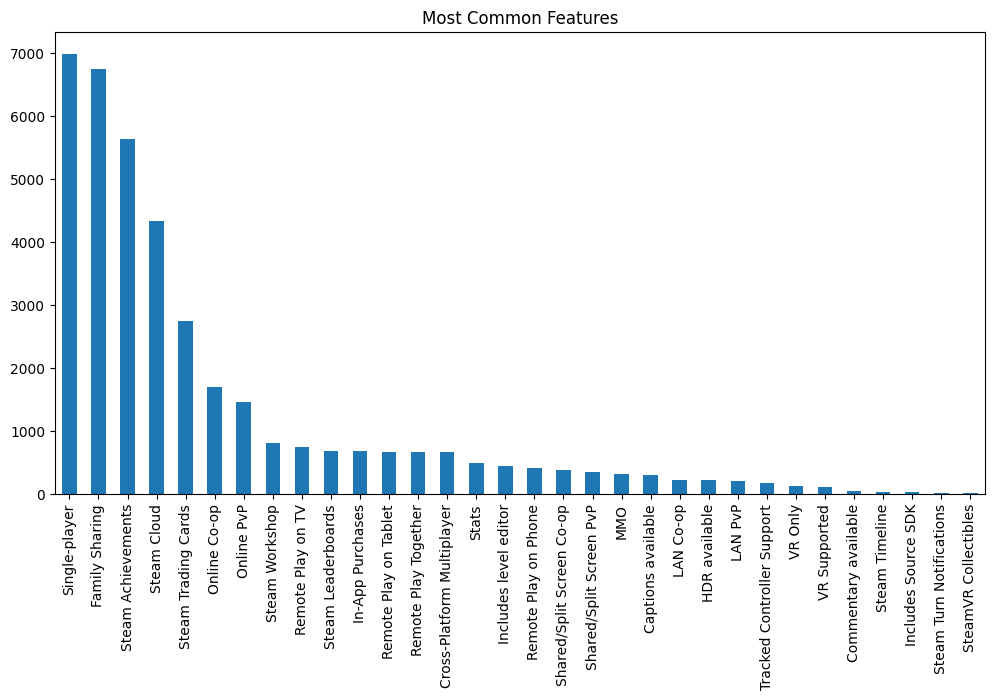

In [69]:
feature_cols = [col for col in df_with_price.columns if col not in ['tags','price','rating']]
feature_usage = df_with_price[feature_cols].sum().sort_values(ascending=False)

feature_usage.plot(kind='bar', figsize=(12,6), title="Most Common Features")

C:\Users\jeevi\AppData\Local\Temp\ipykernel_5296\2296143956.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


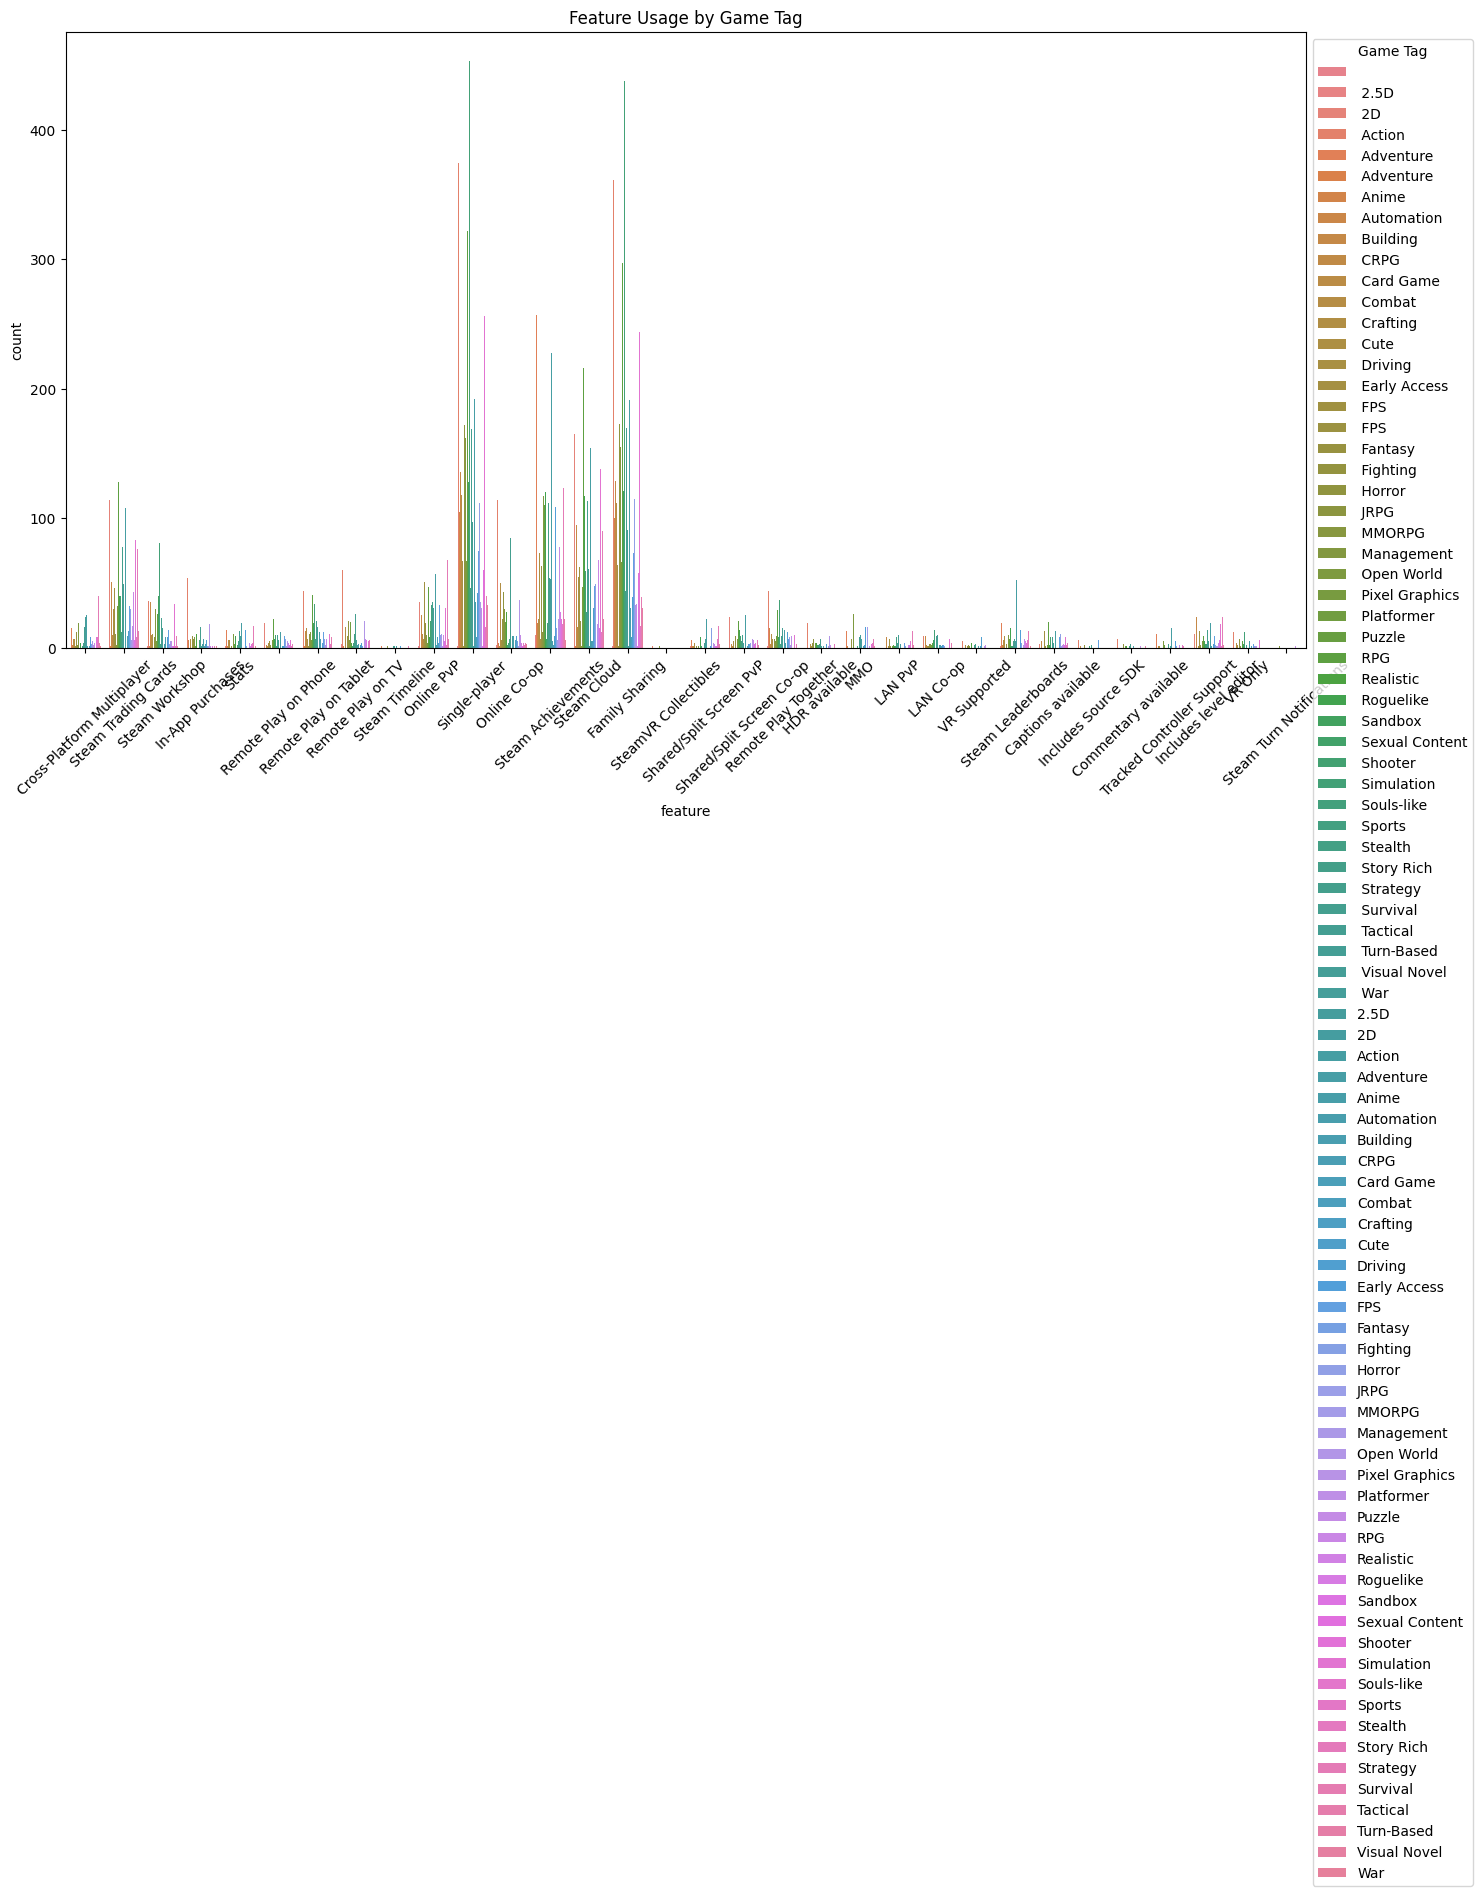

In [78]:
feature_by_tag = df_with_price.groupby('tags')[feature_cols].sum()
df_melted = feature_by_tag.reset_index().melt(id_vars='tags', var_name='feature', value_name='count')
plt.figure(figsize=(16,8))
sns.barplot(data=df_melted, x='feature', y='count', hue='tags')

plt.title('Feature Usage by Game Tag')
plt.xticks(rotation=45)
plt.legend(title='Game Tag',loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

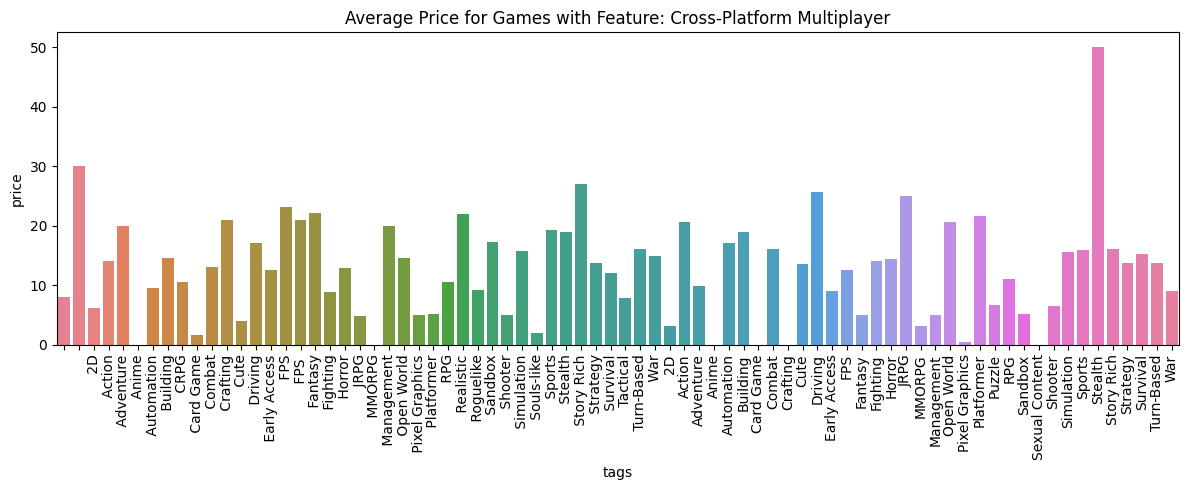

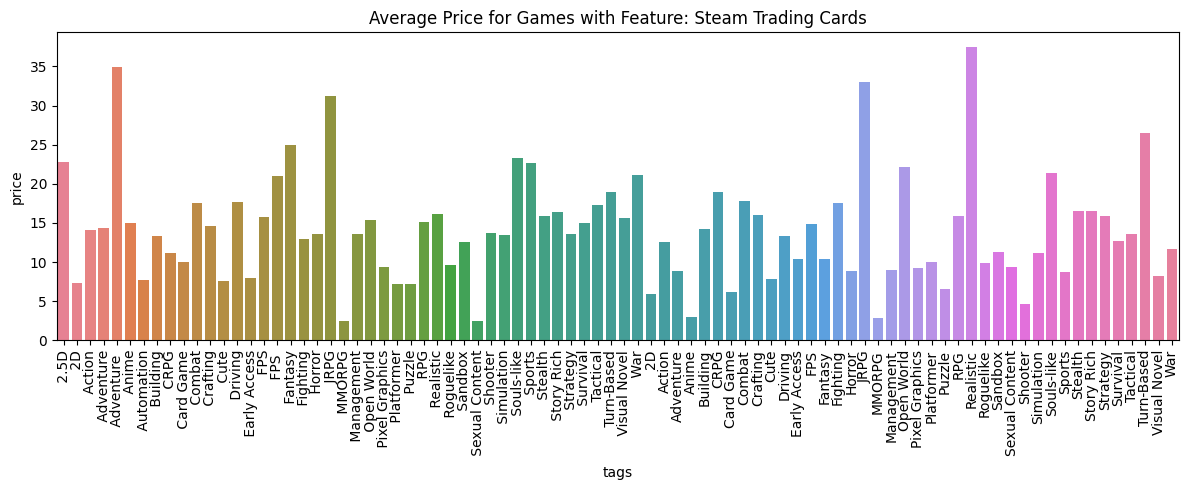

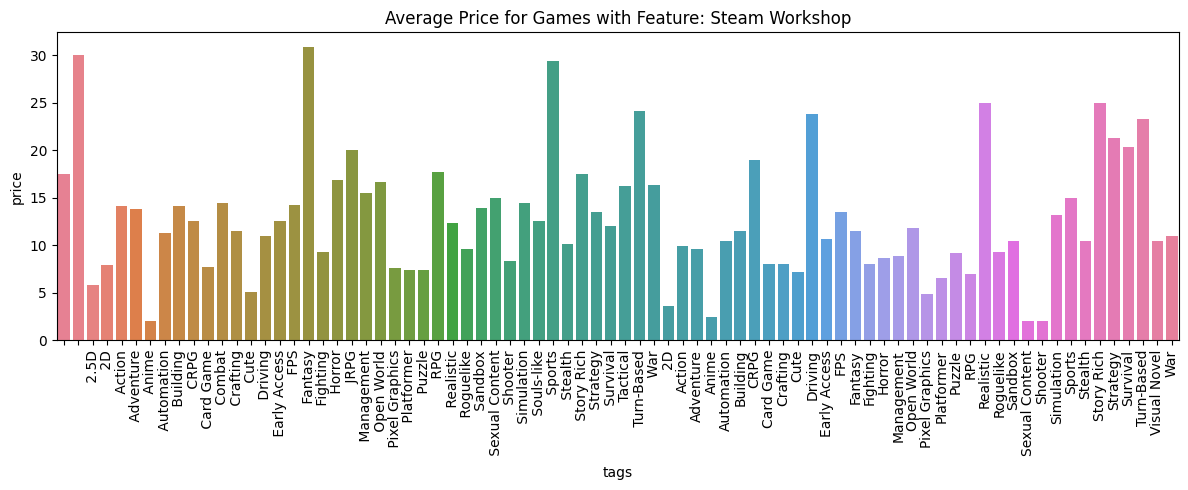

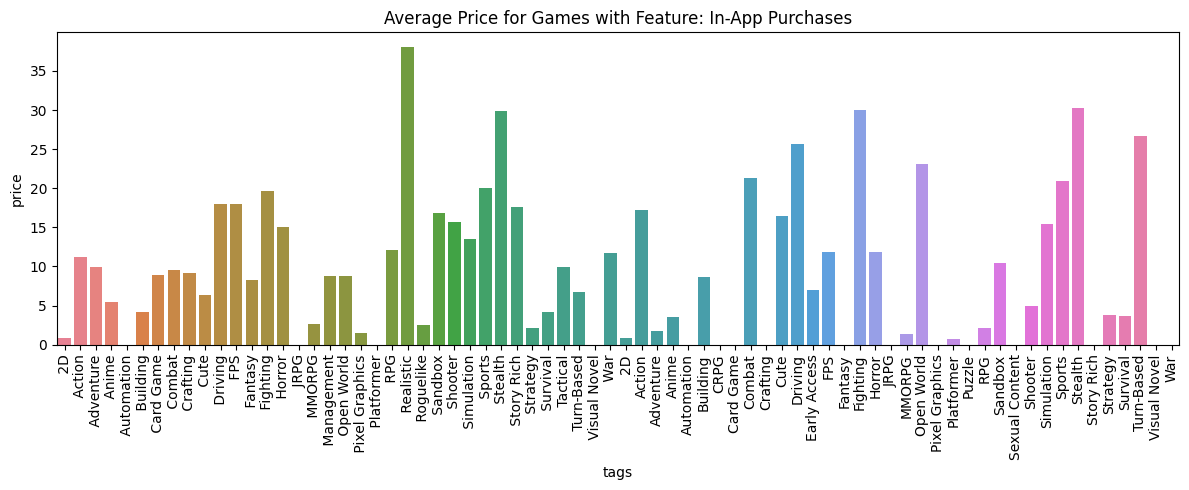

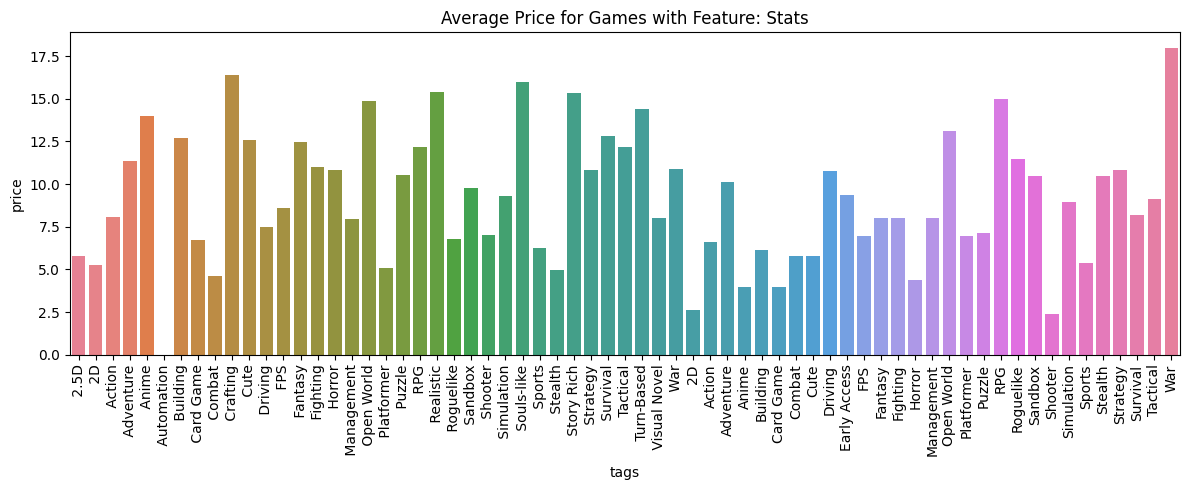

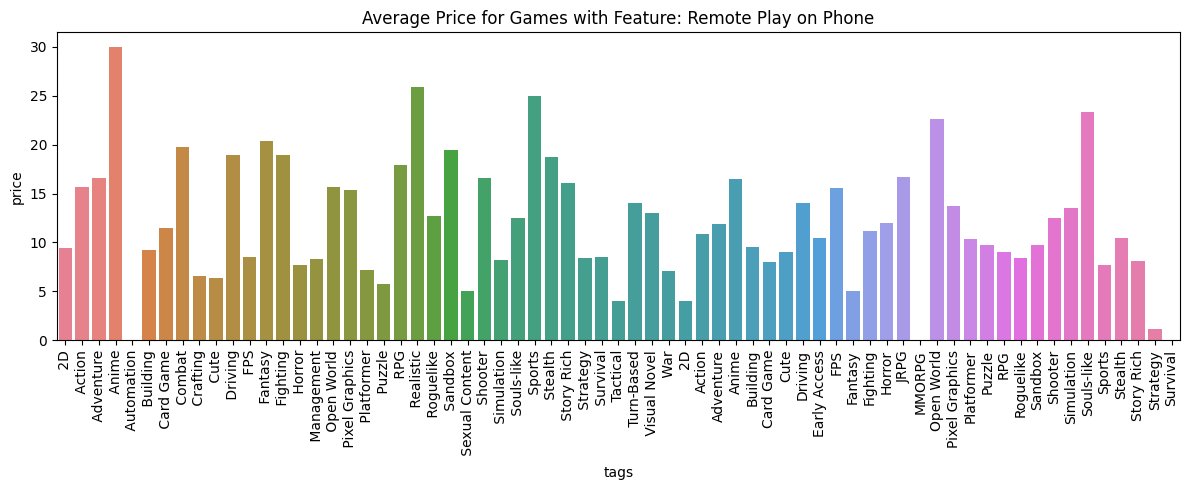

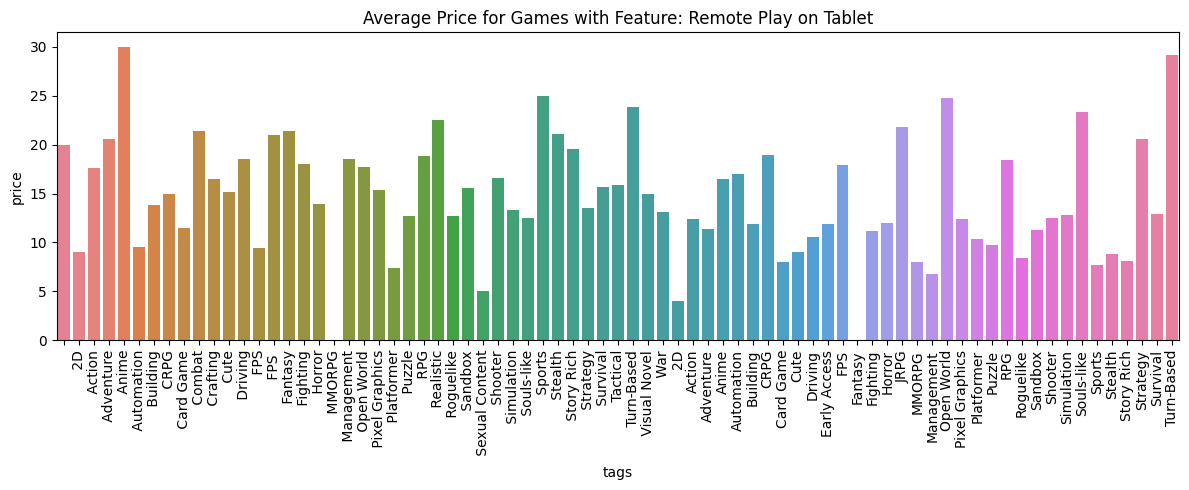

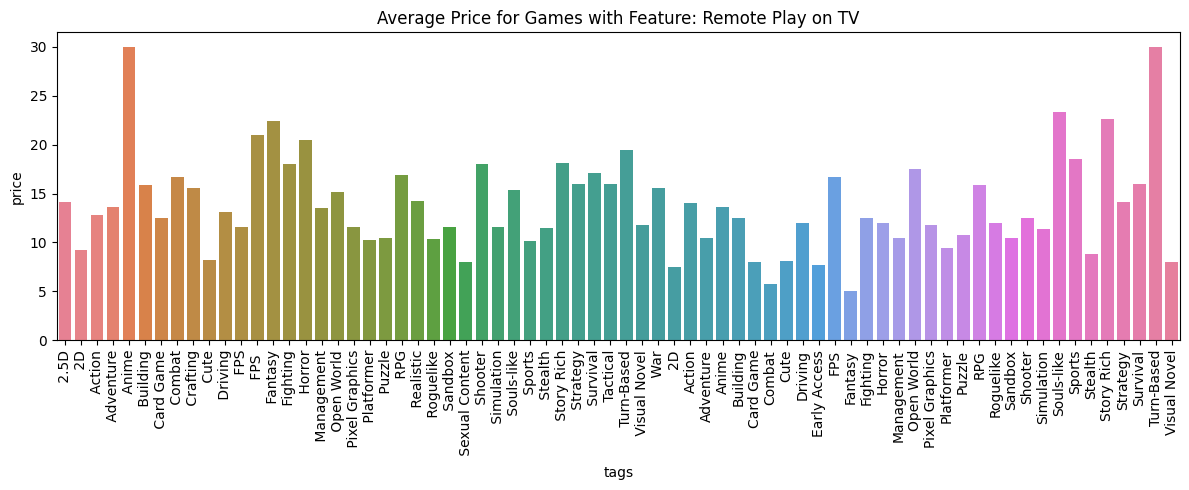

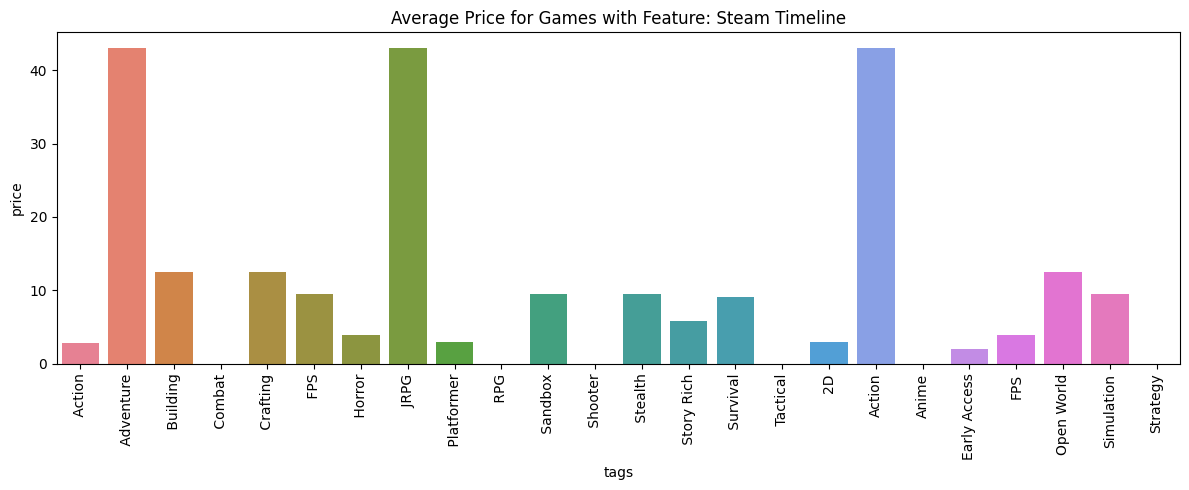

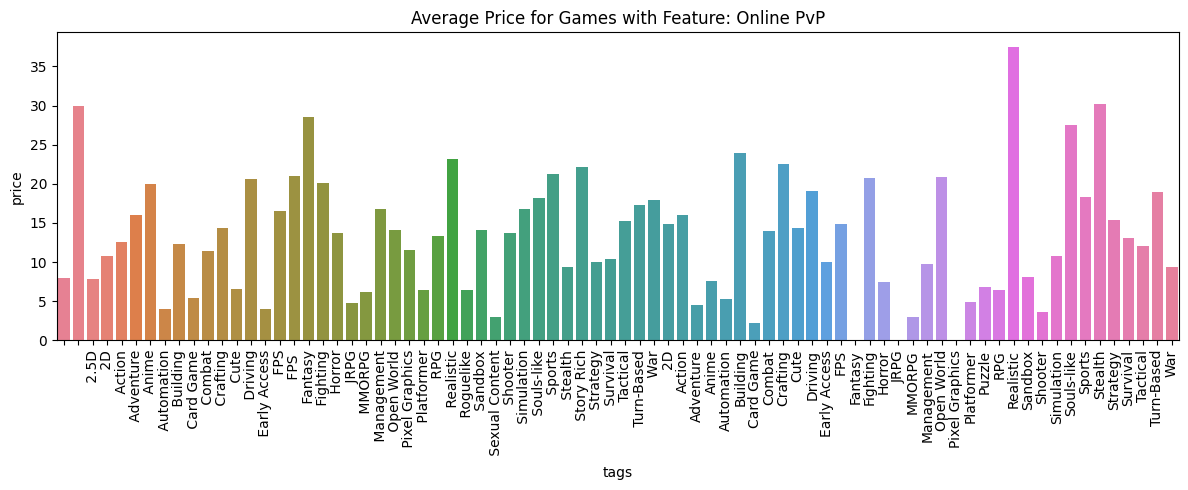

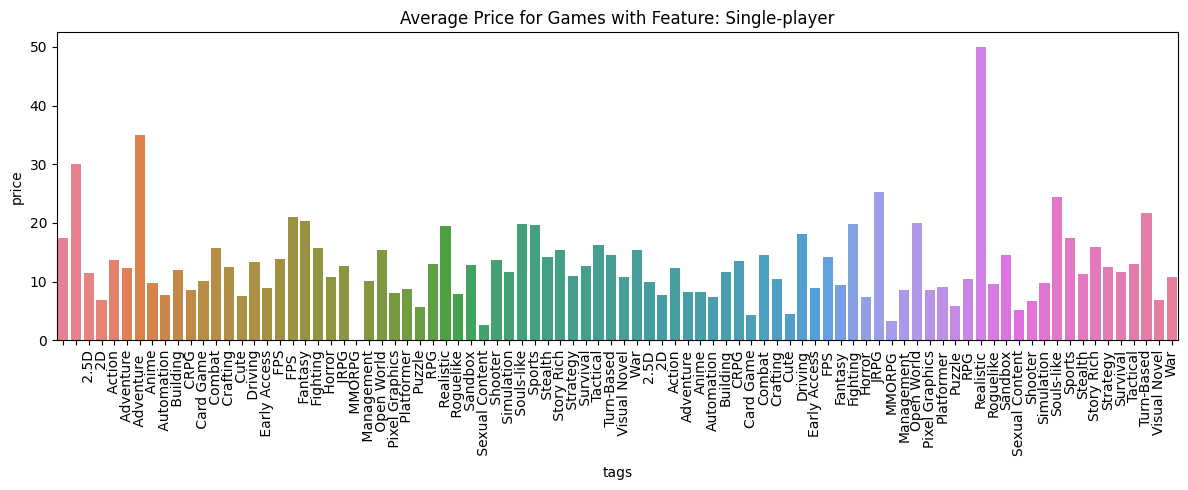

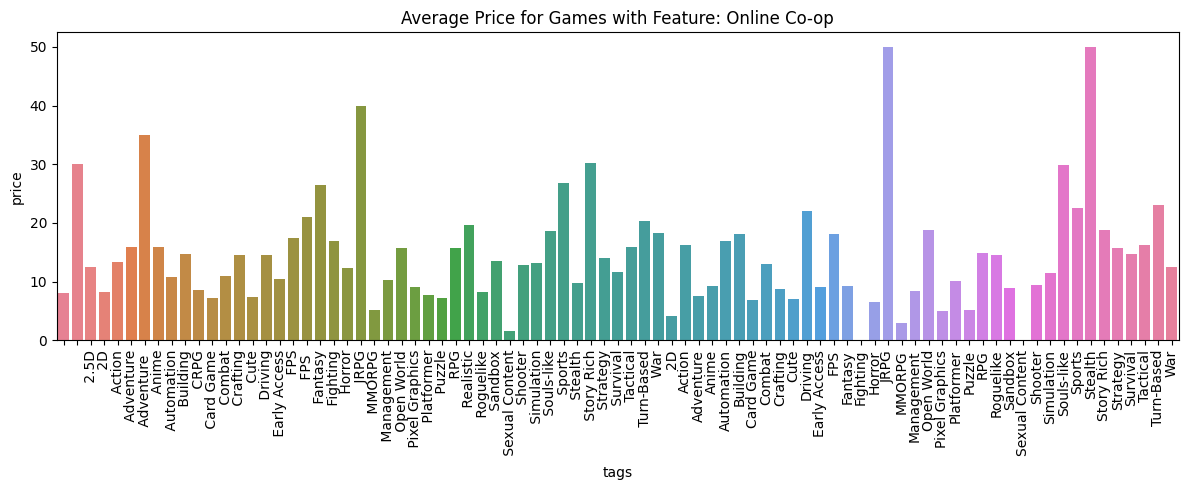

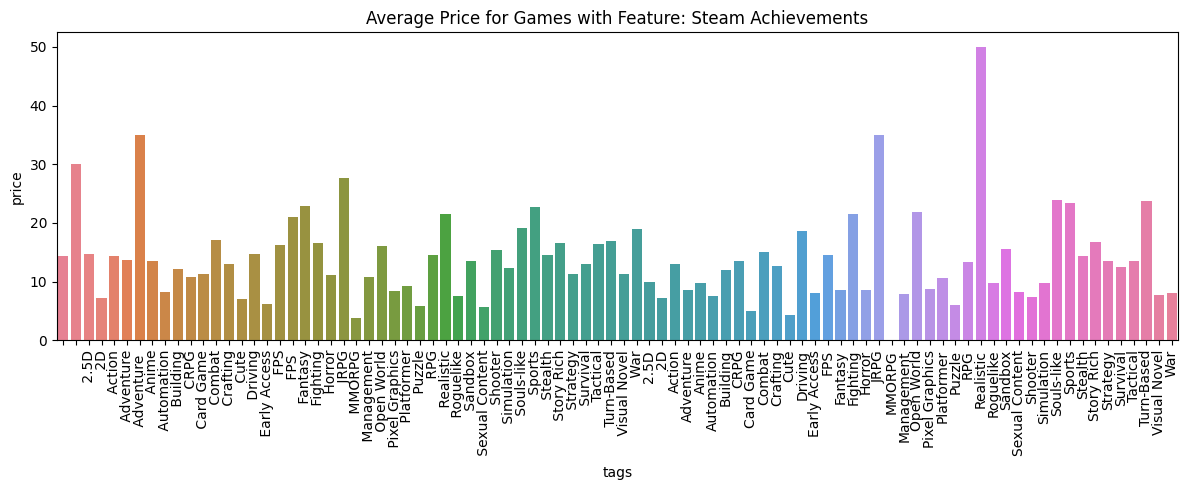

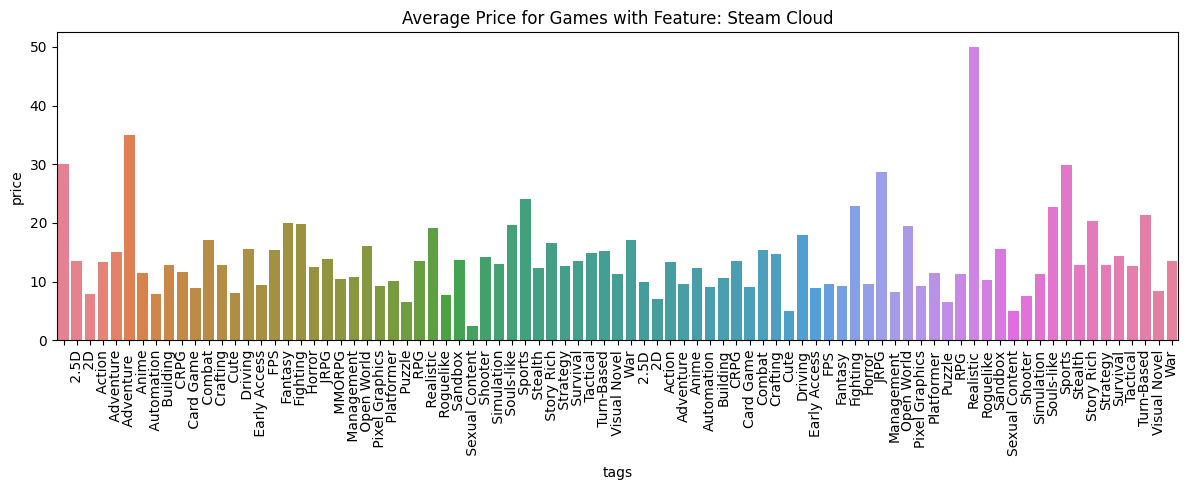

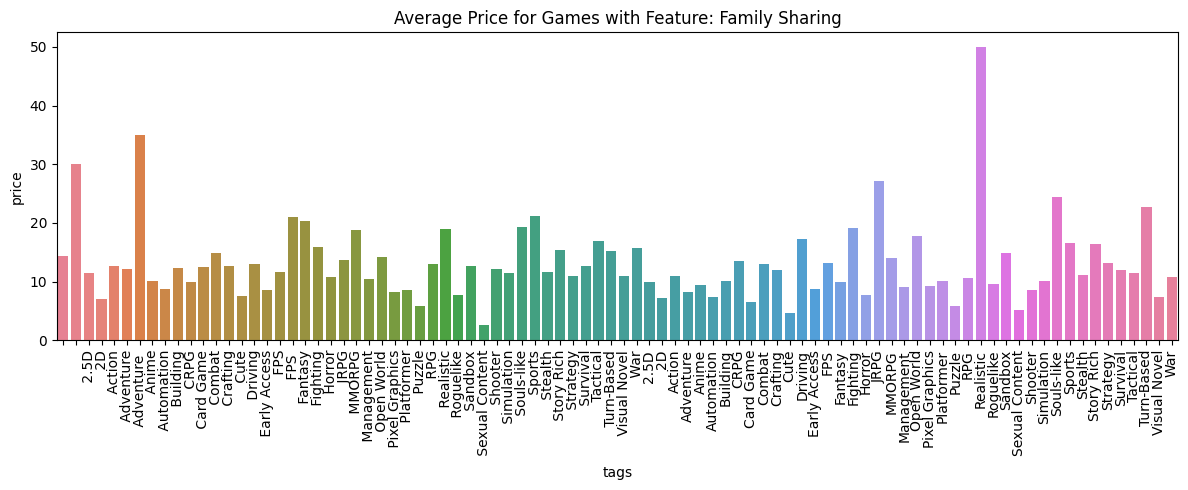

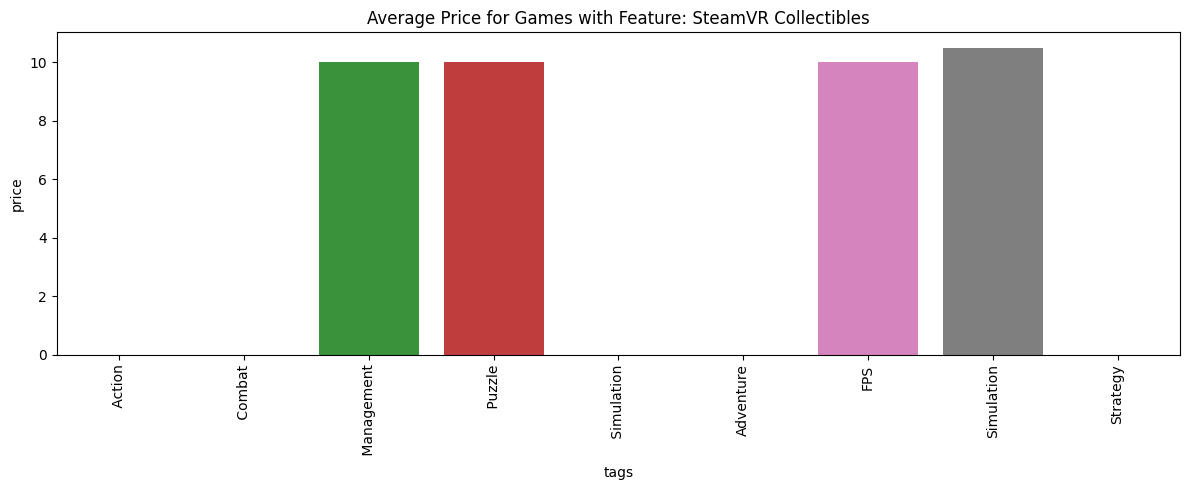

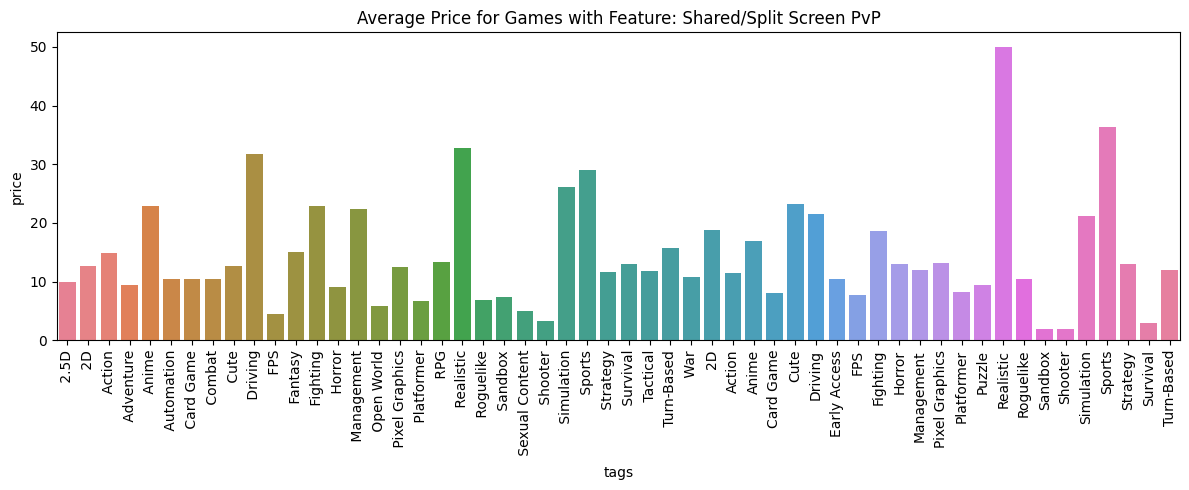

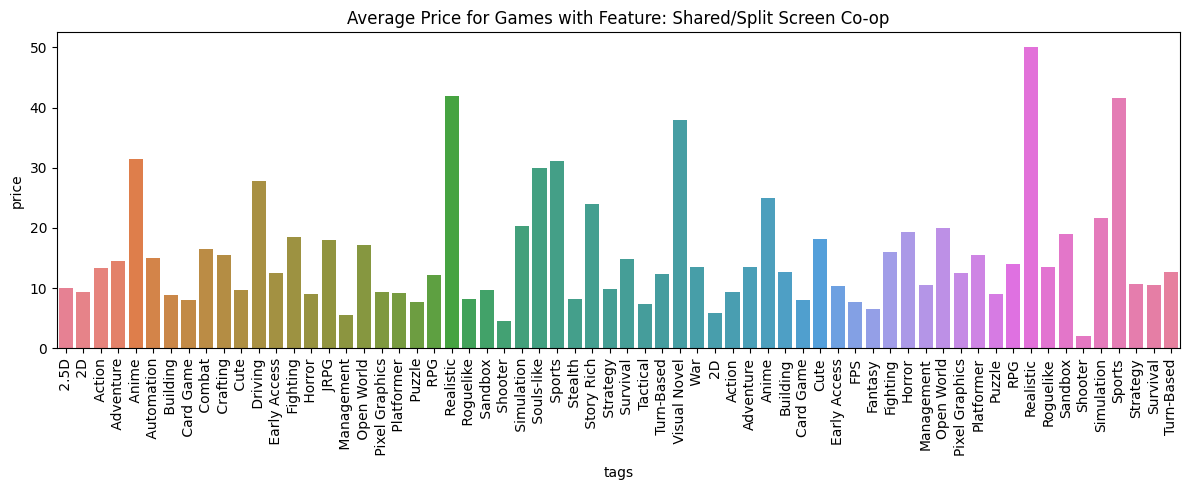

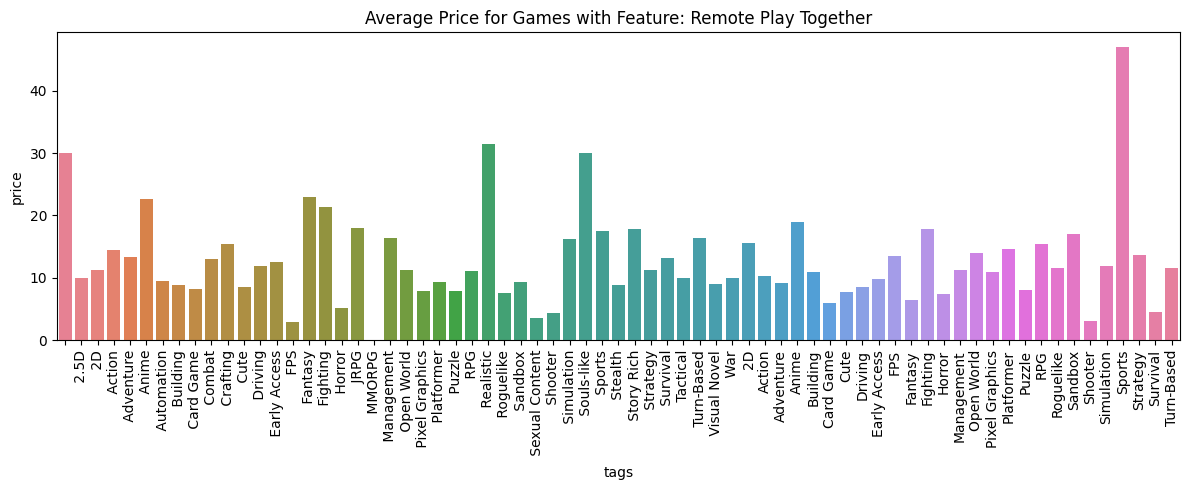

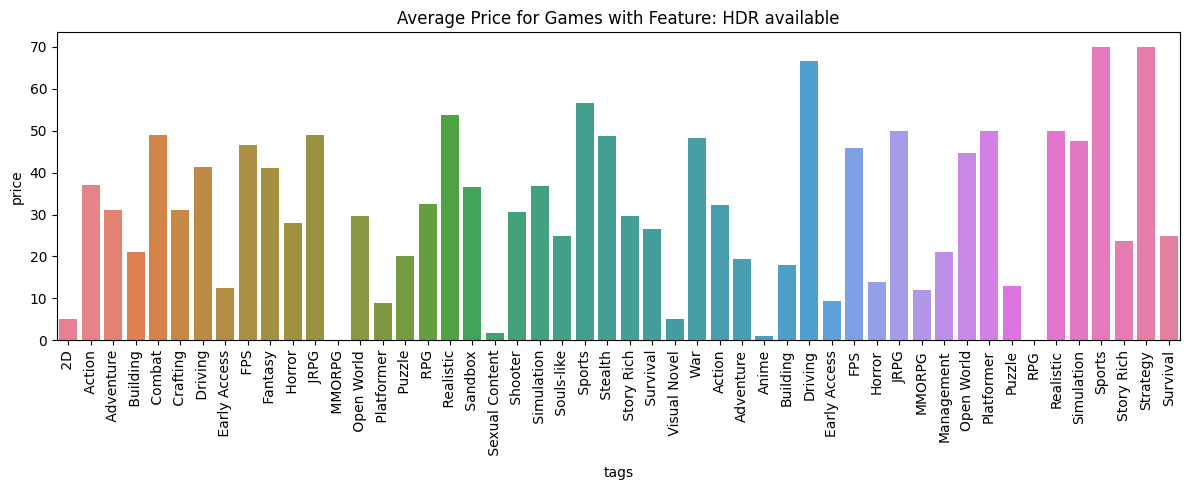

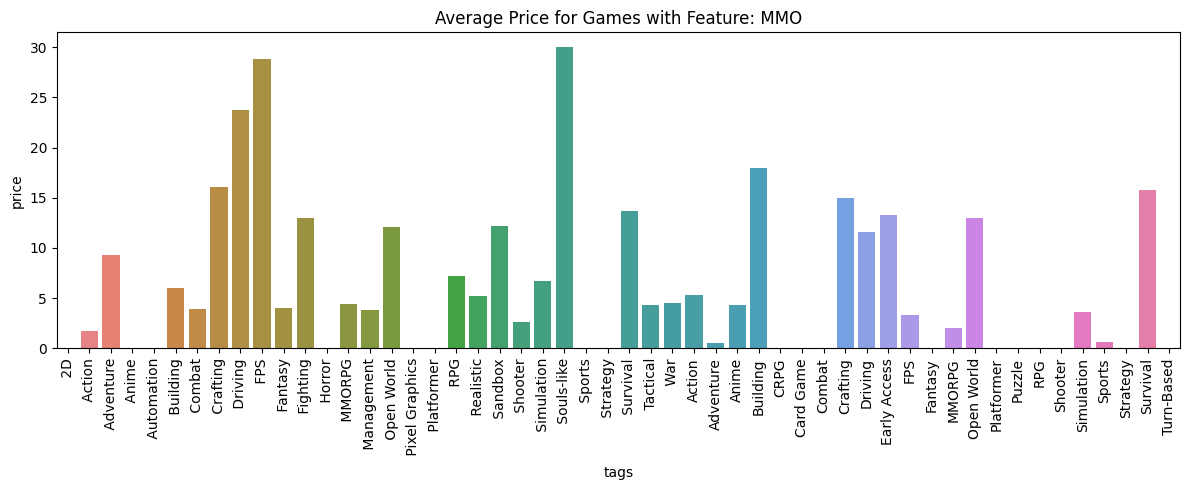

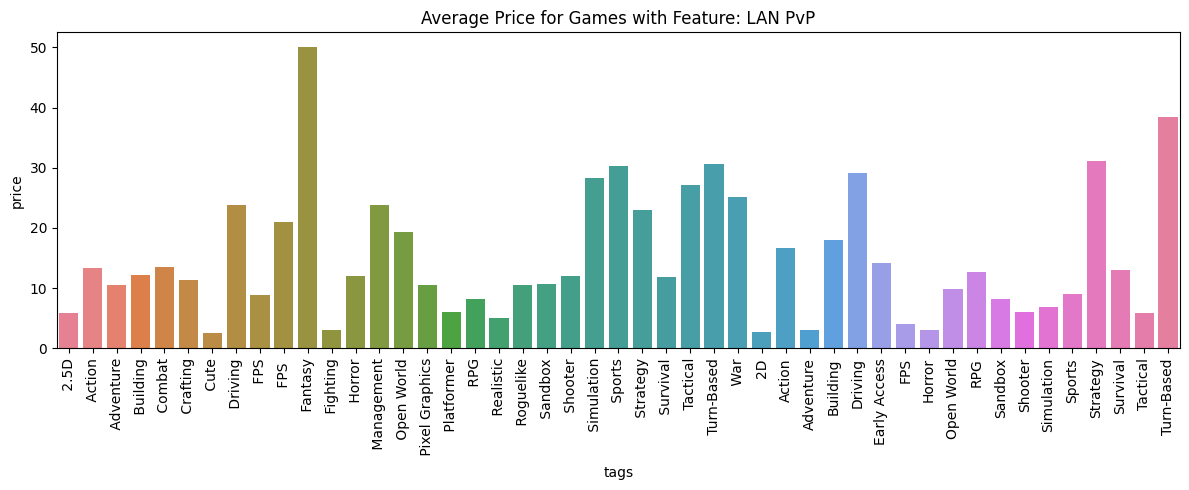

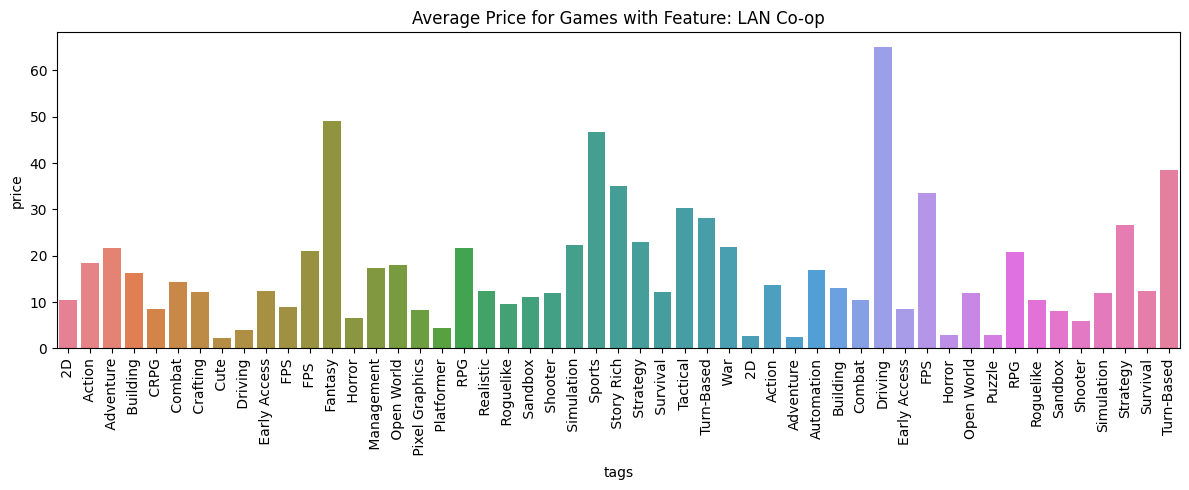

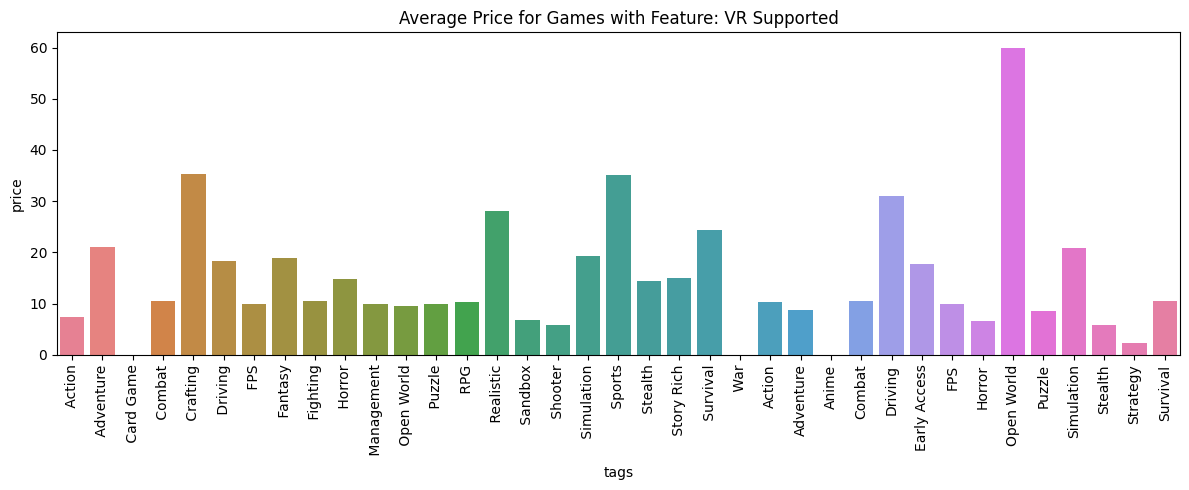

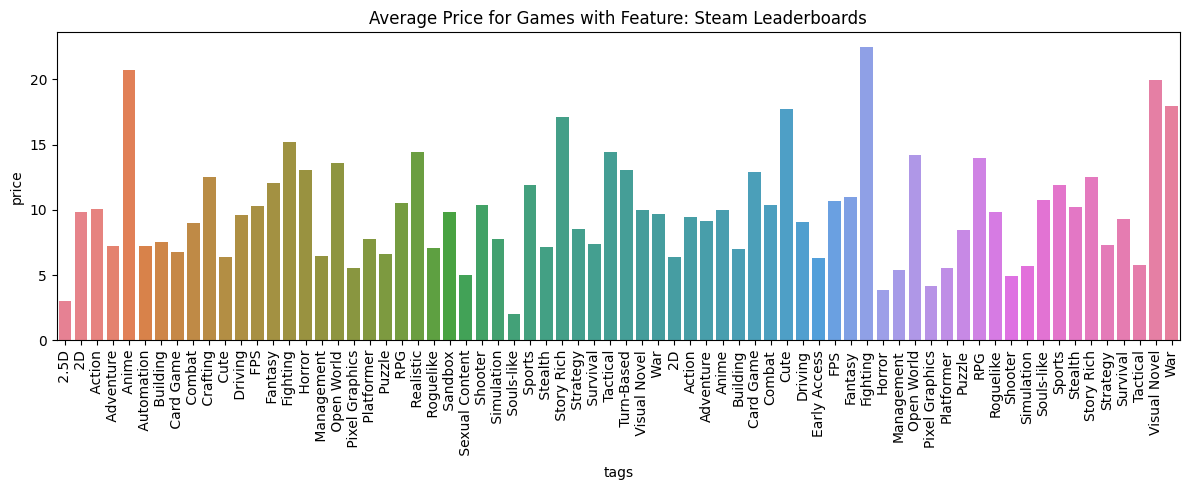

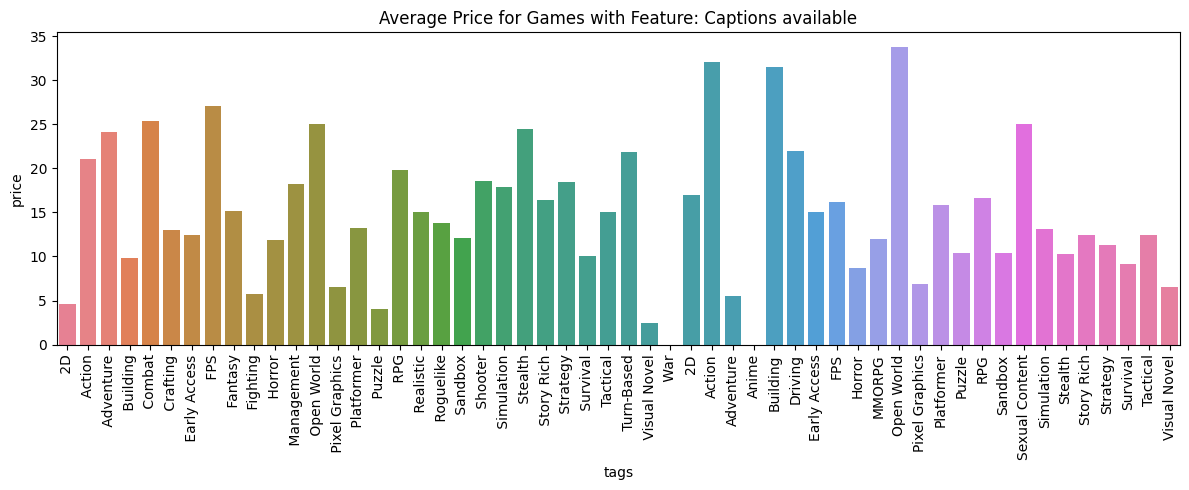

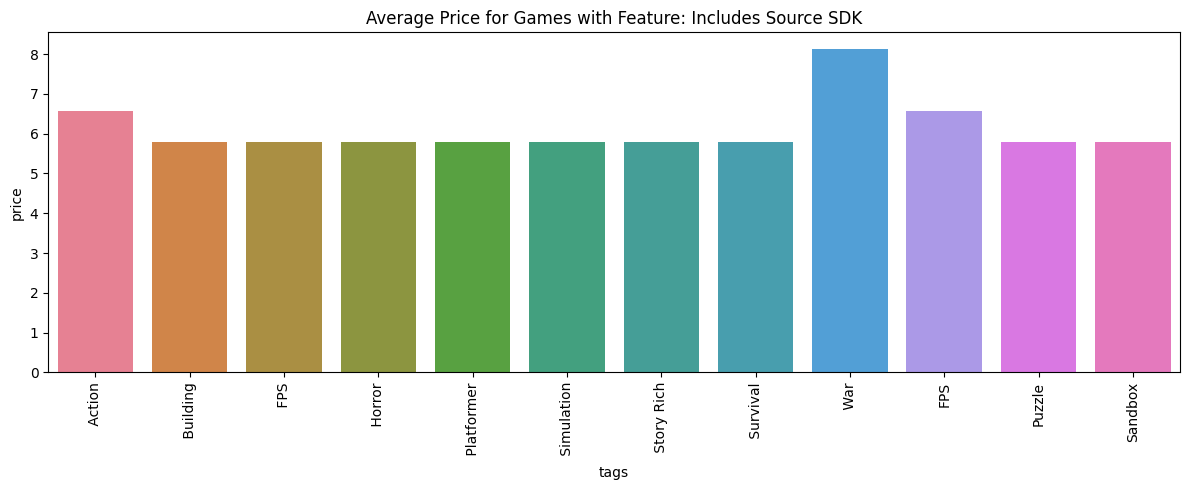

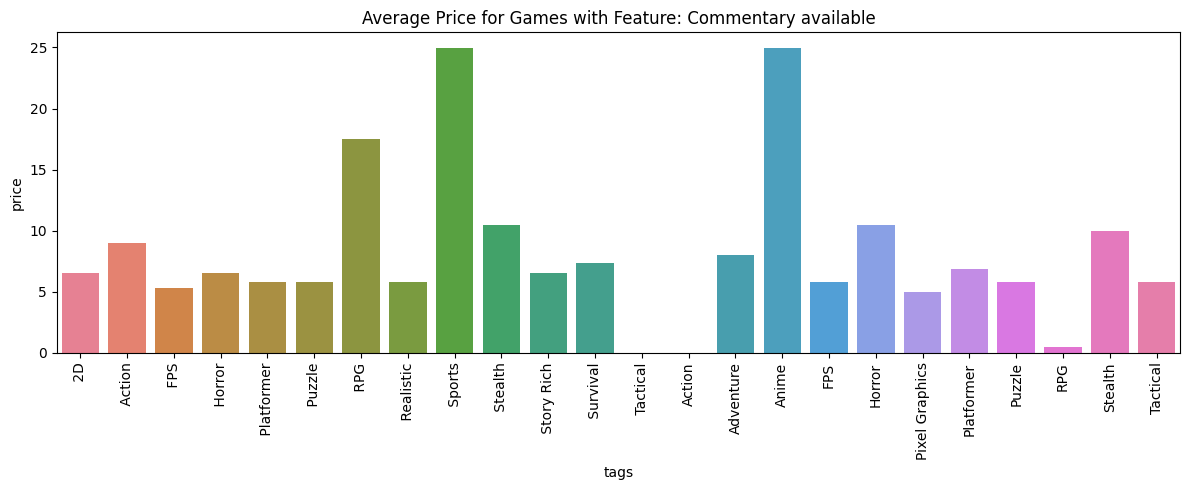

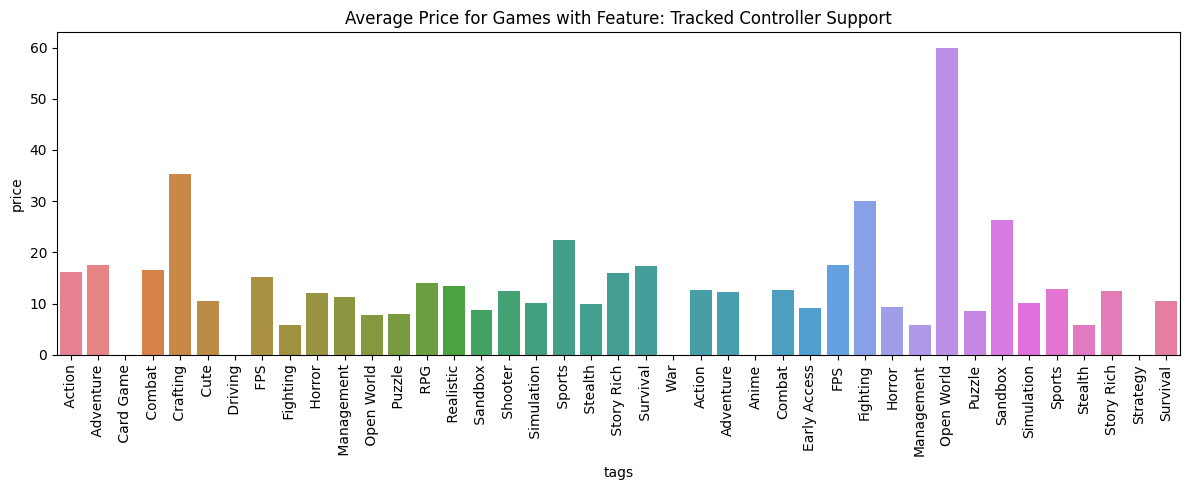

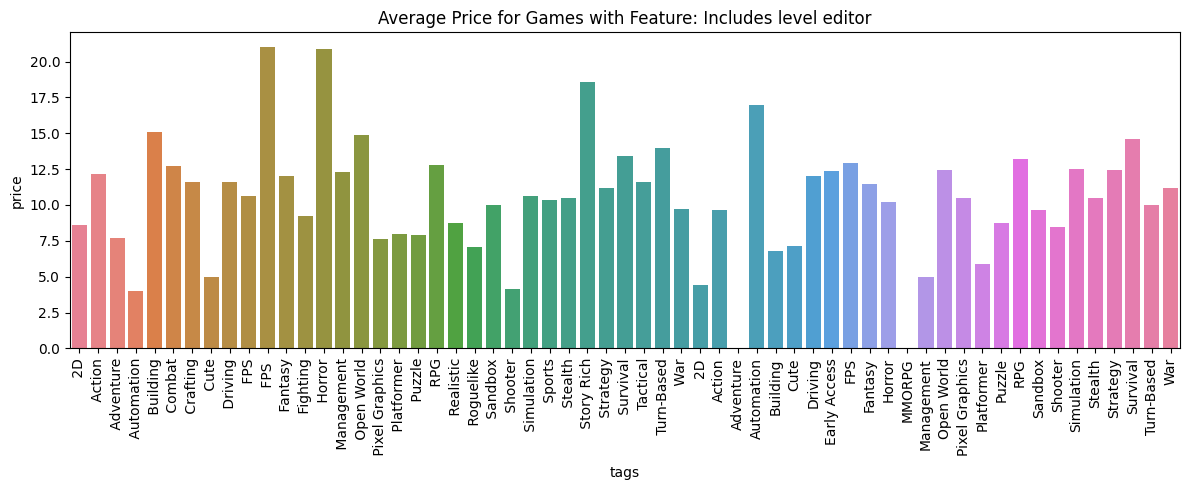

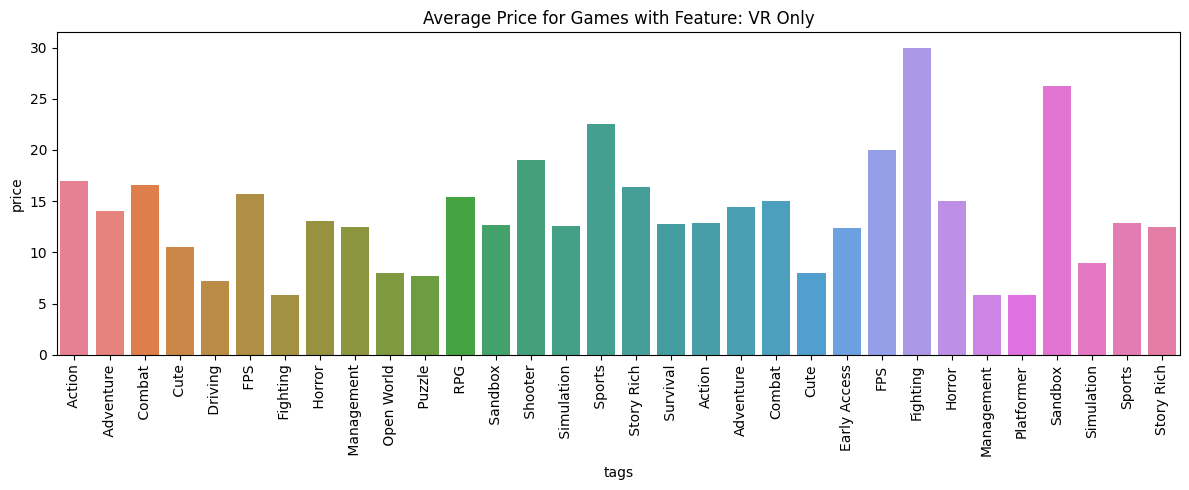

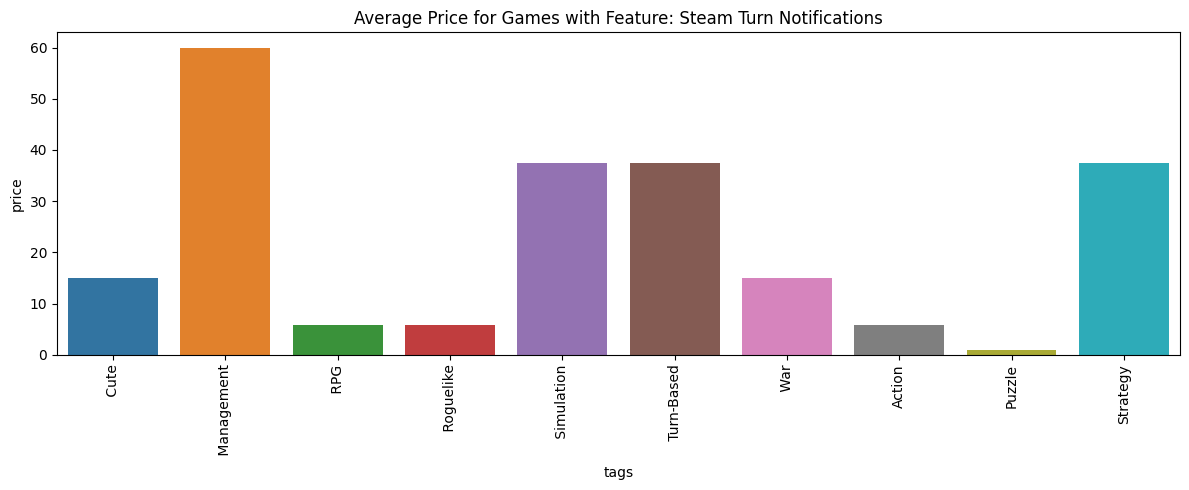

In [83]:
for col in feature_cols:
    df1 = df_with_price[df_with_price[col] == 1]
    df_char = df1.groupby("tags")["price"].mean().to_frame("price").reset_index()


    plt.figure(figsize=(12, 5))
    sns.barplot(data=df_char, x="tags", y="price", hue='tags')
    plt.title(f"Average Price for Games with Feature: {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()  

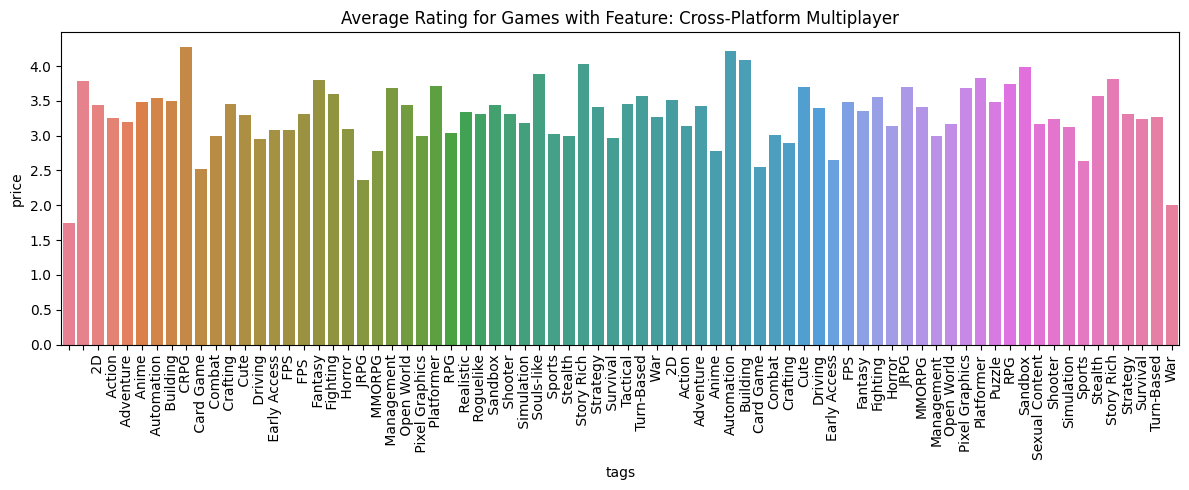

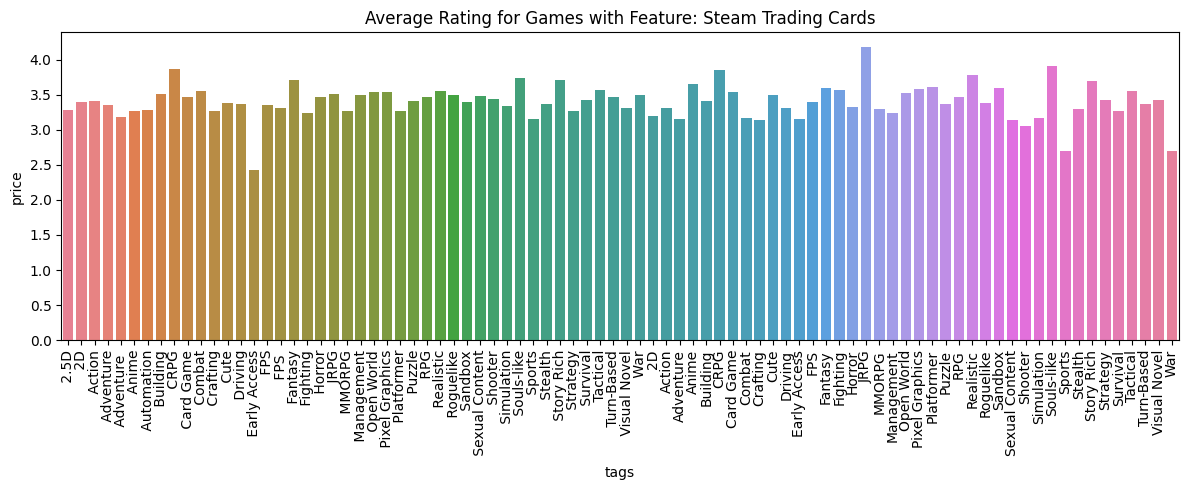

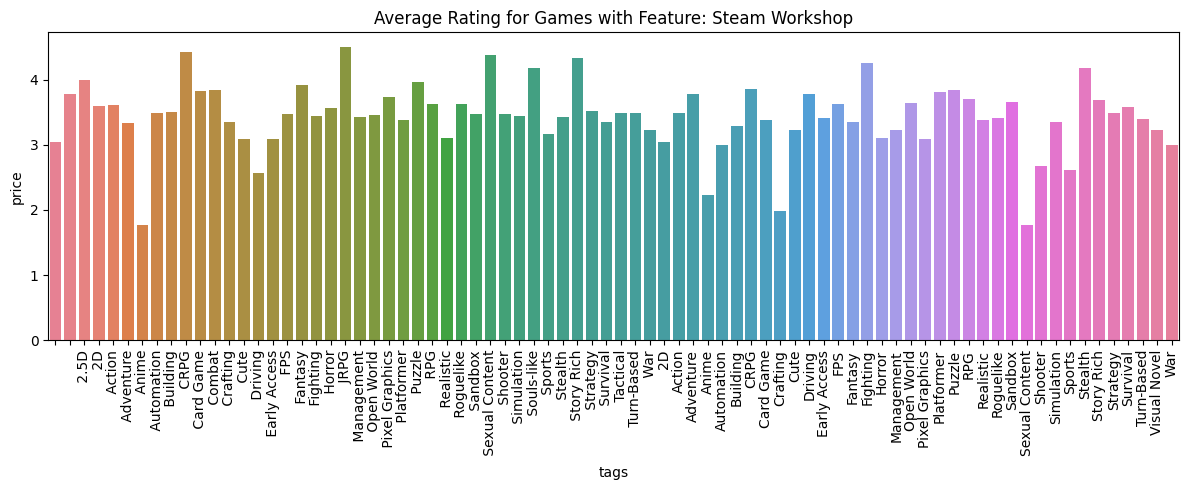

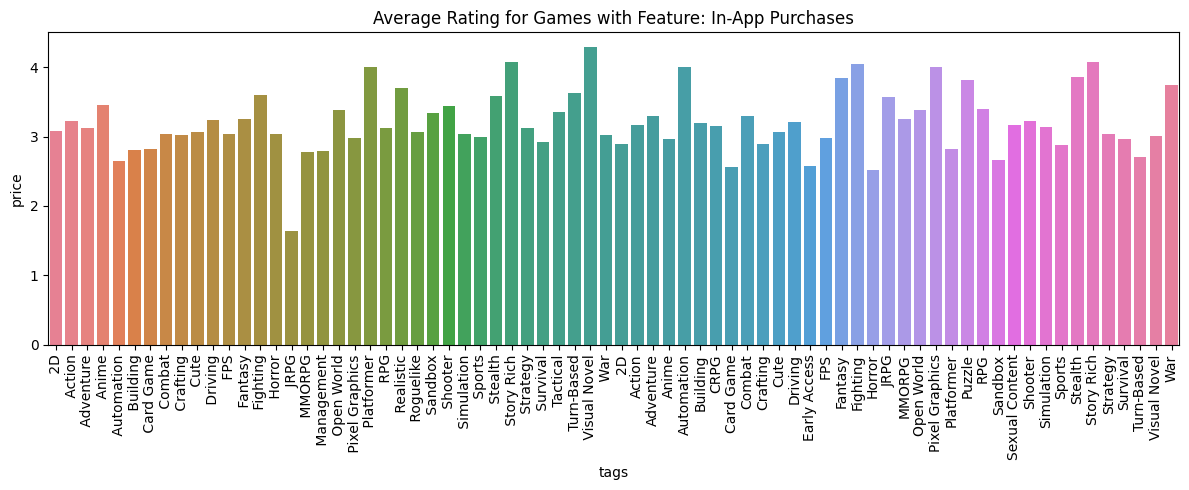

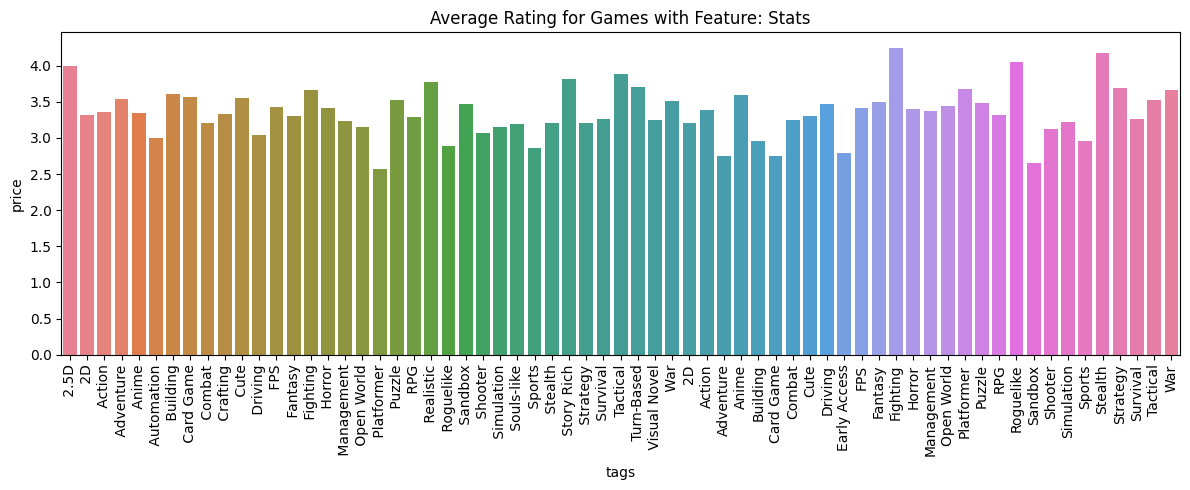

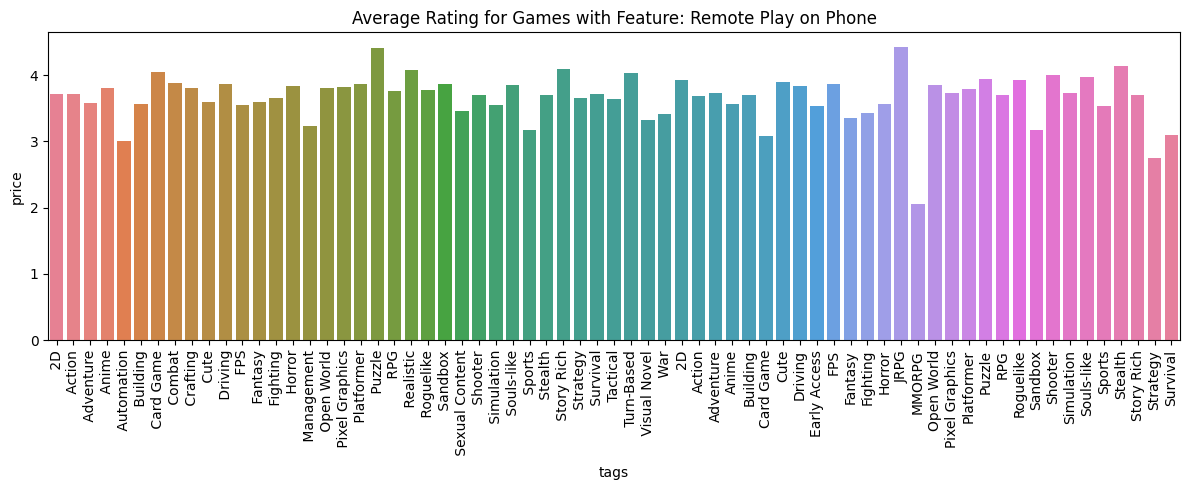

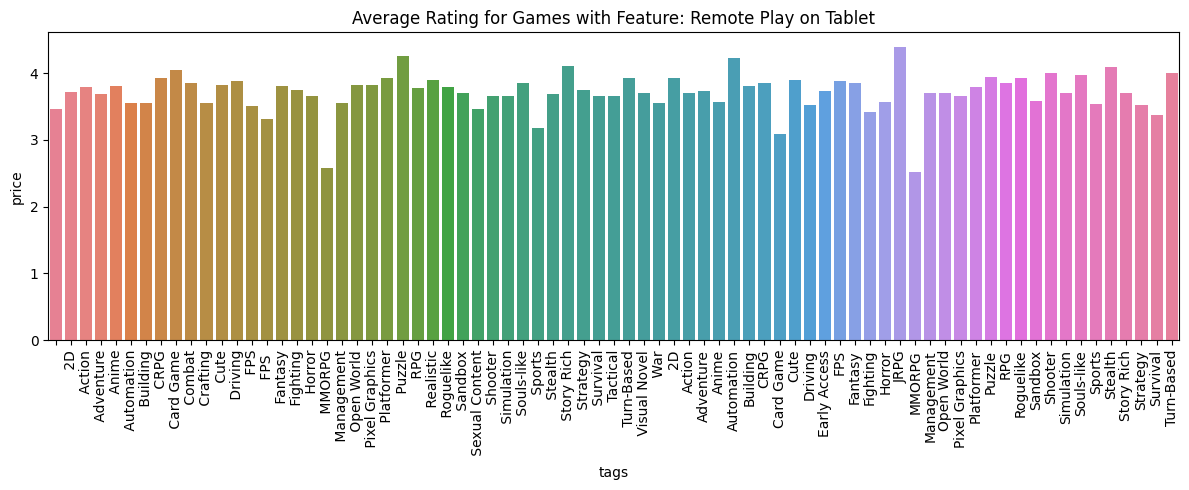

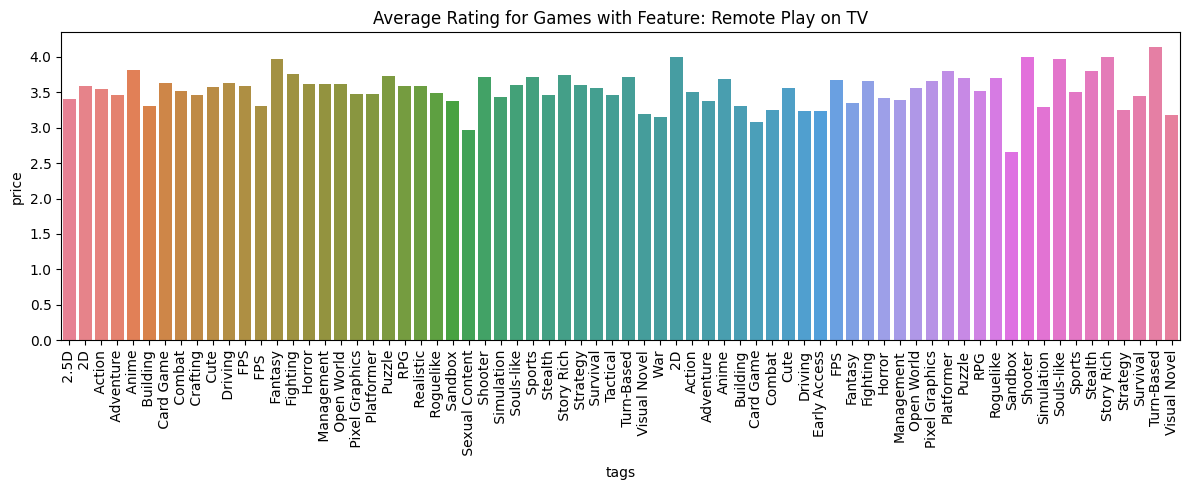

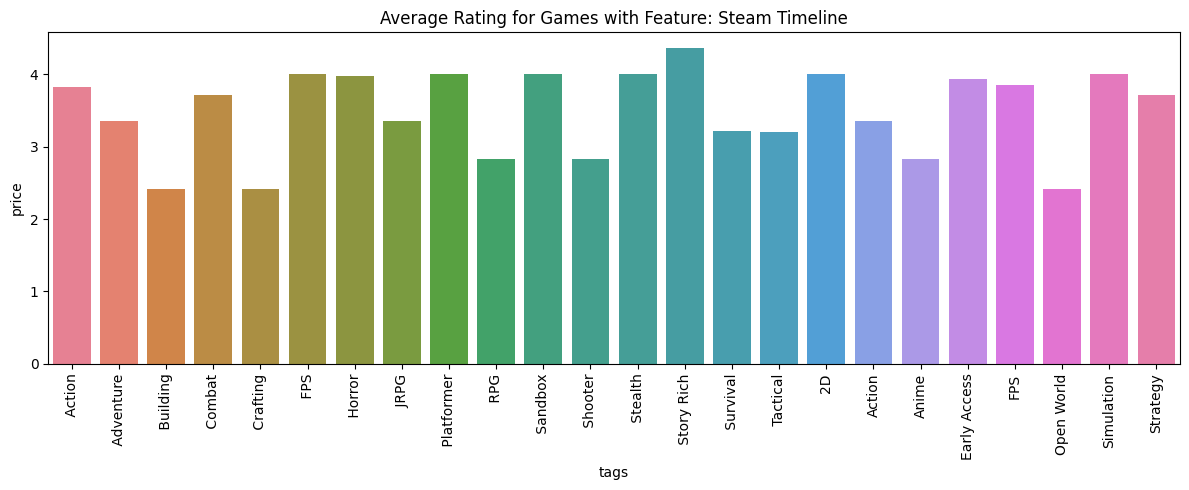

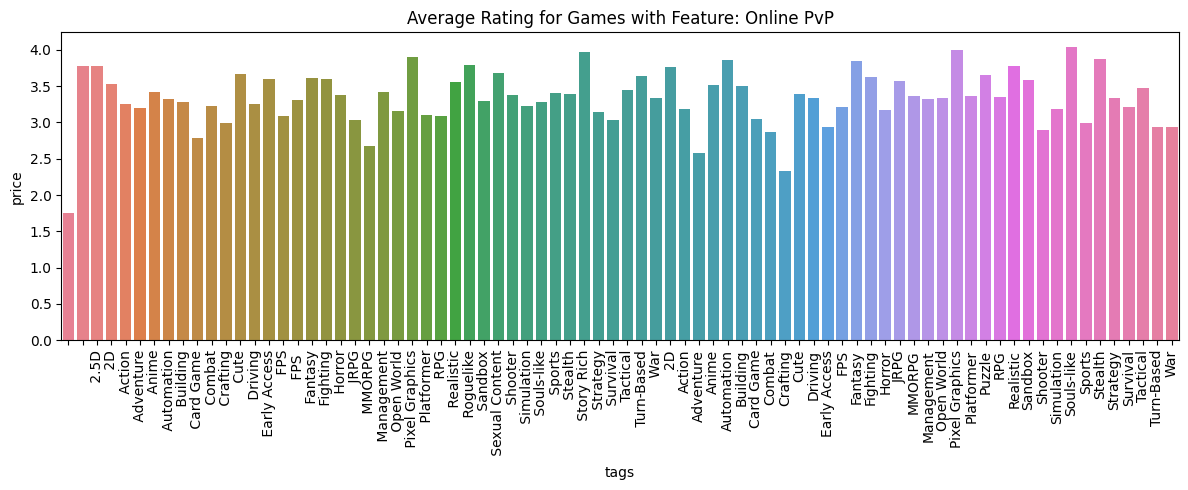

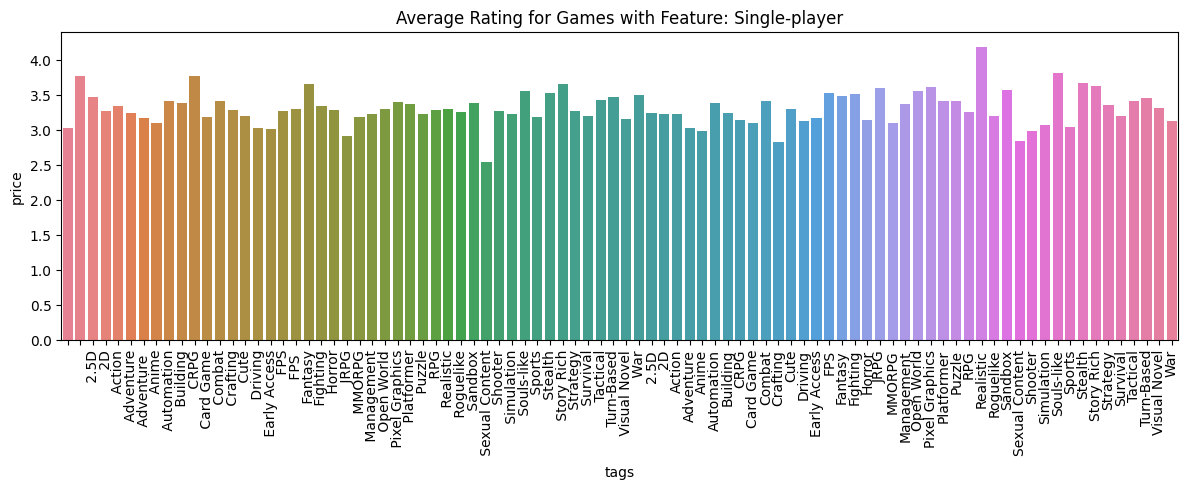

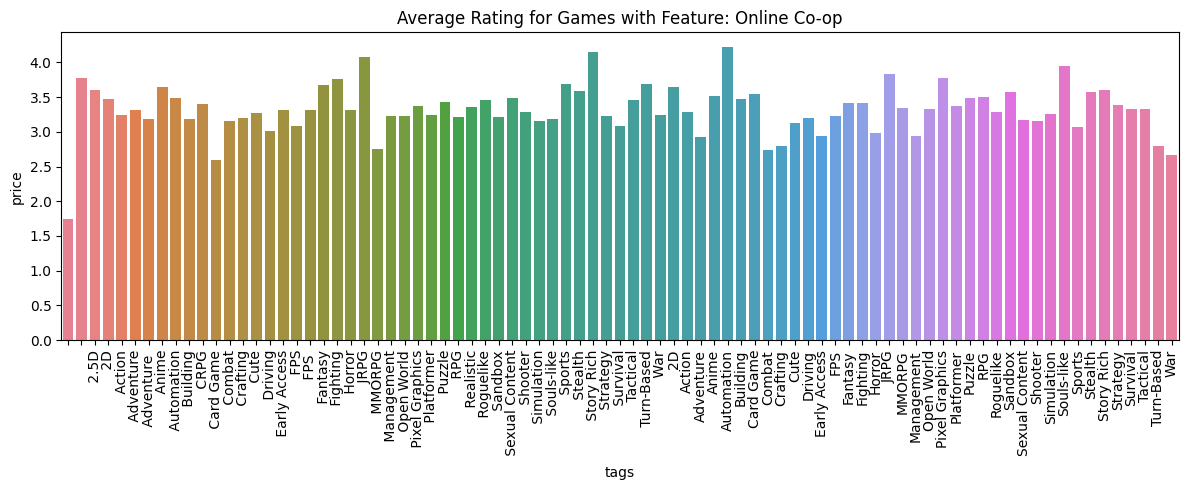

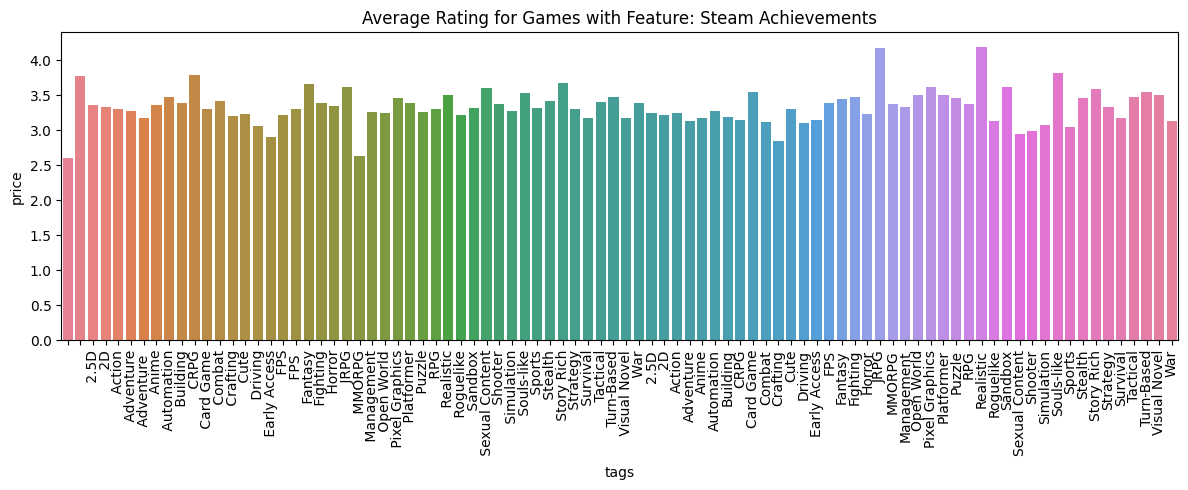

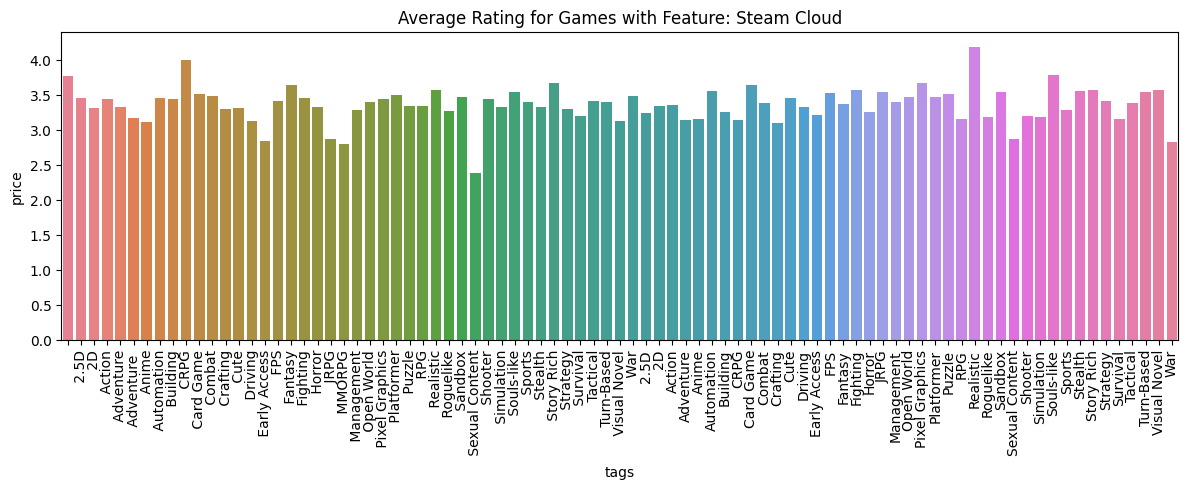

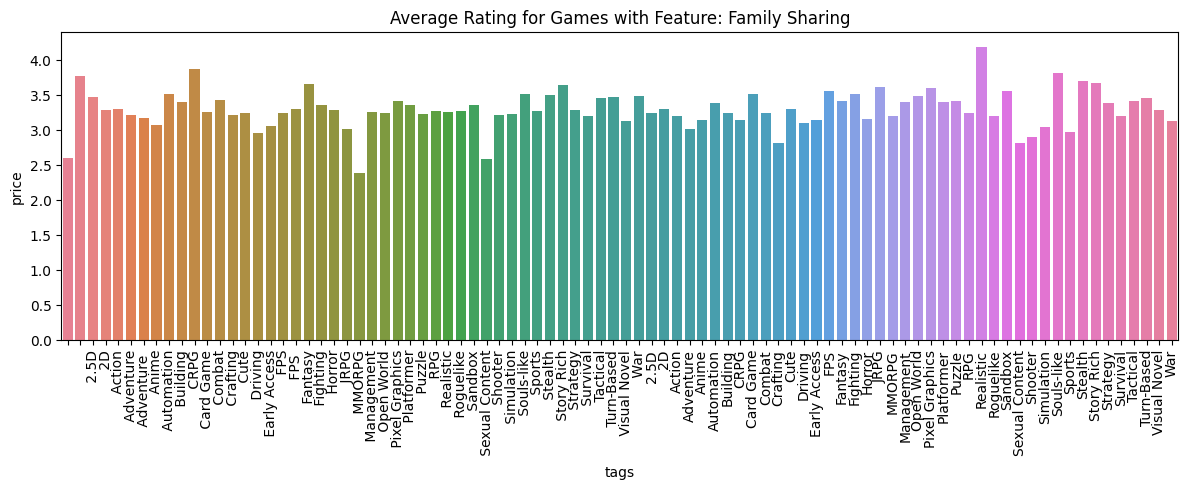

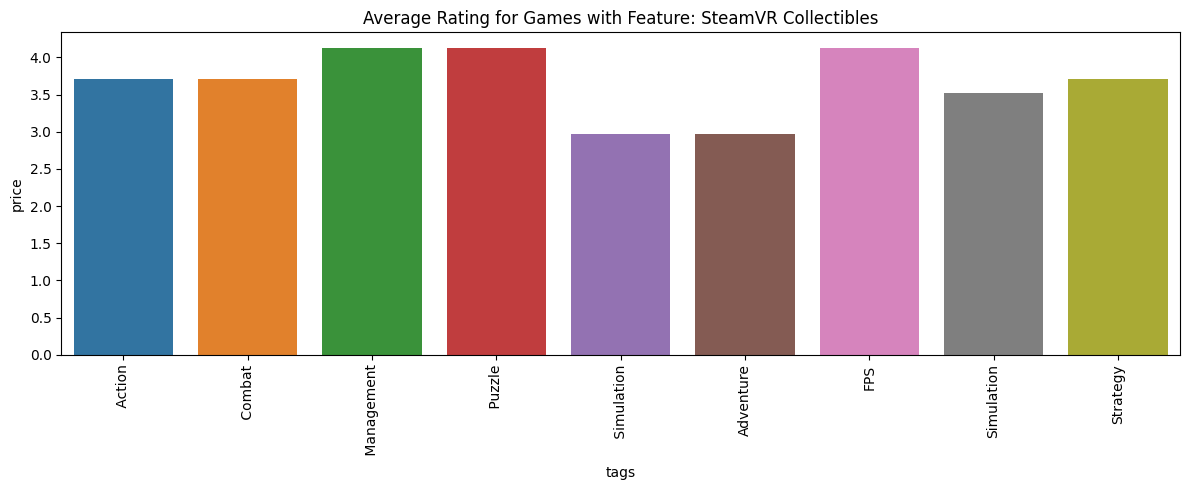

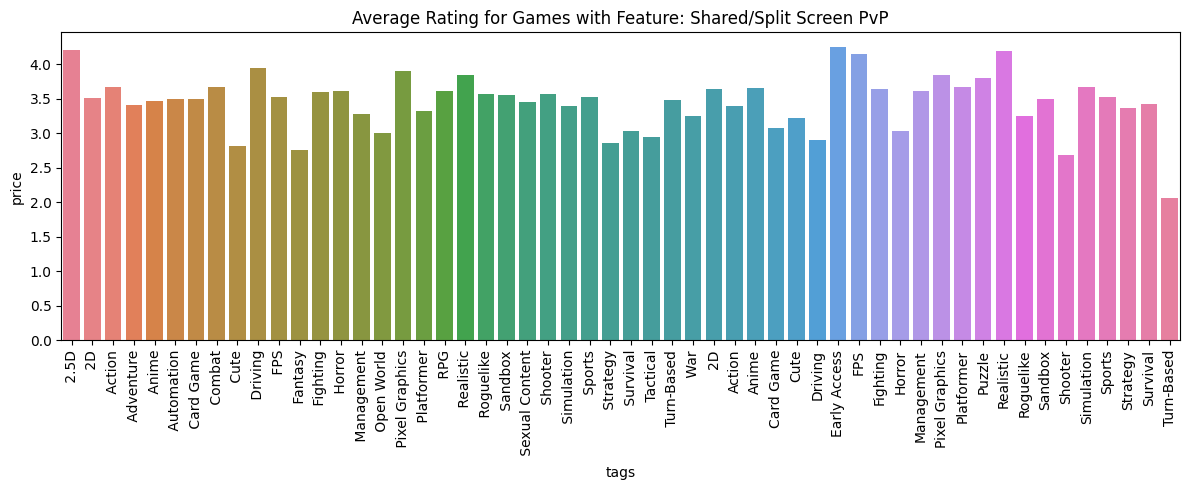

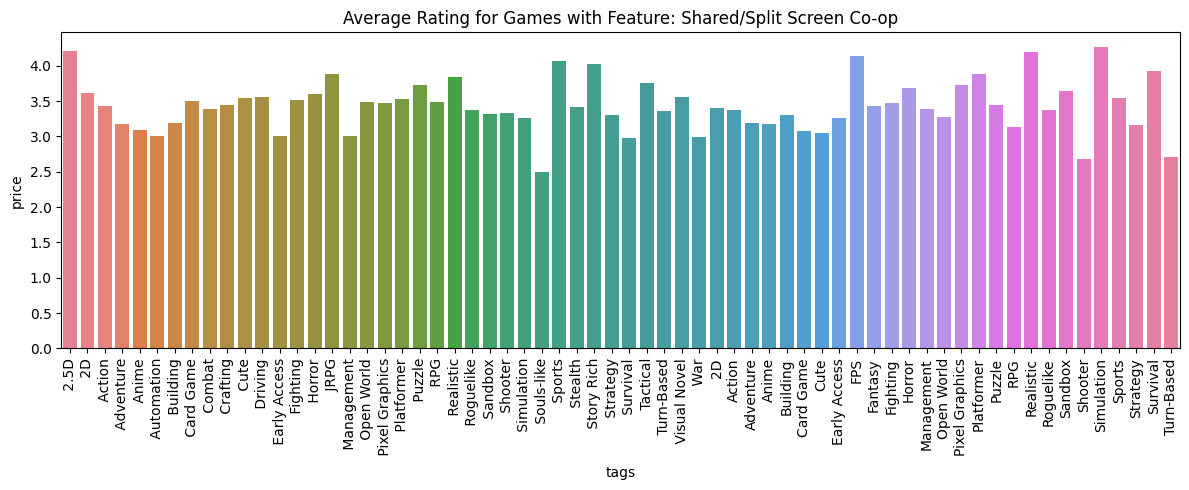

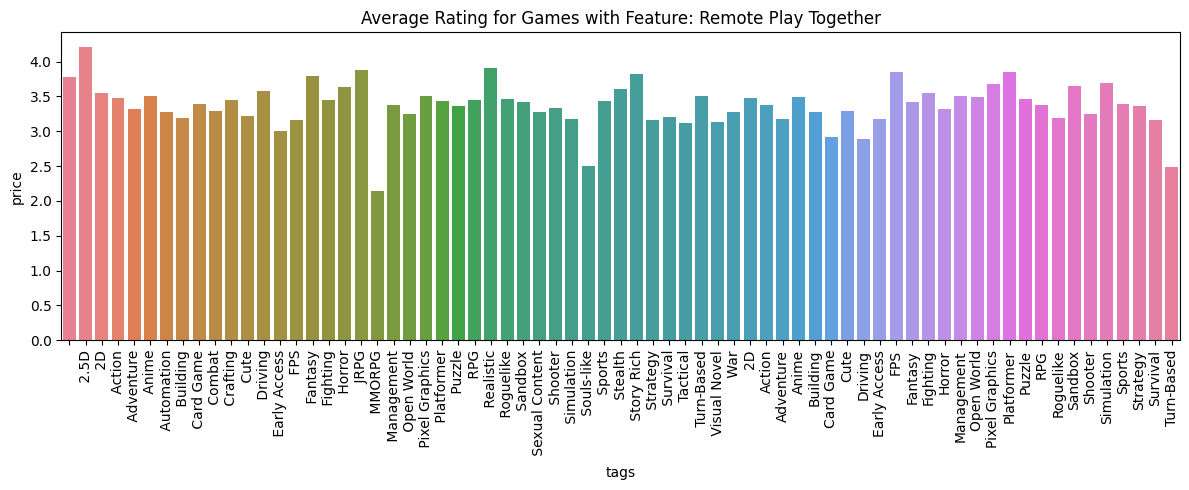

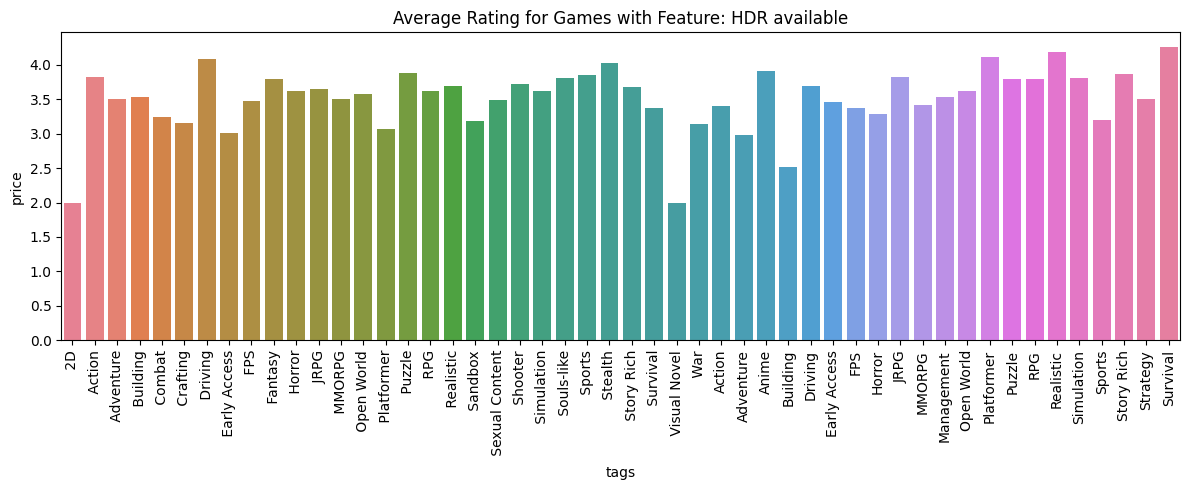

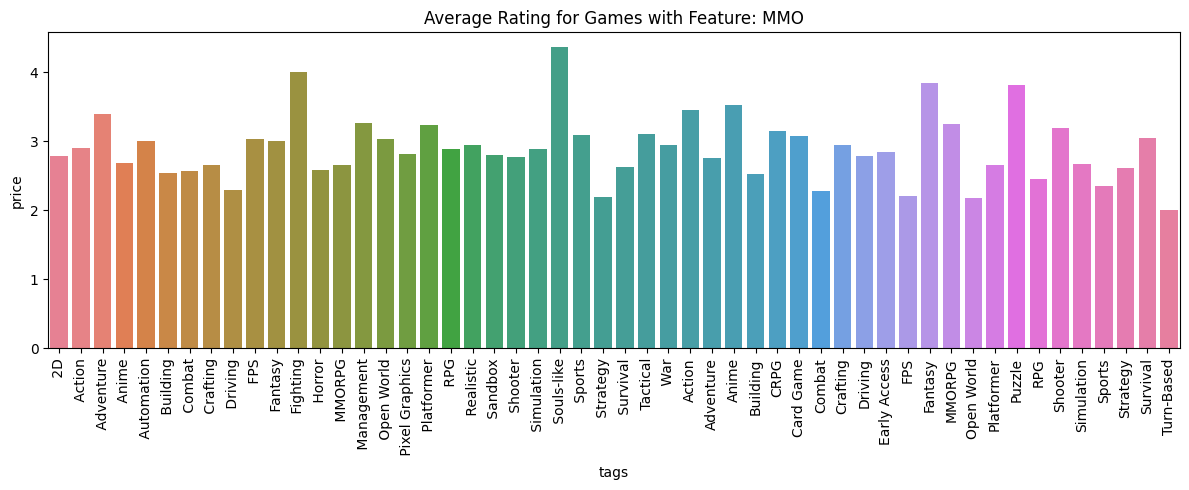

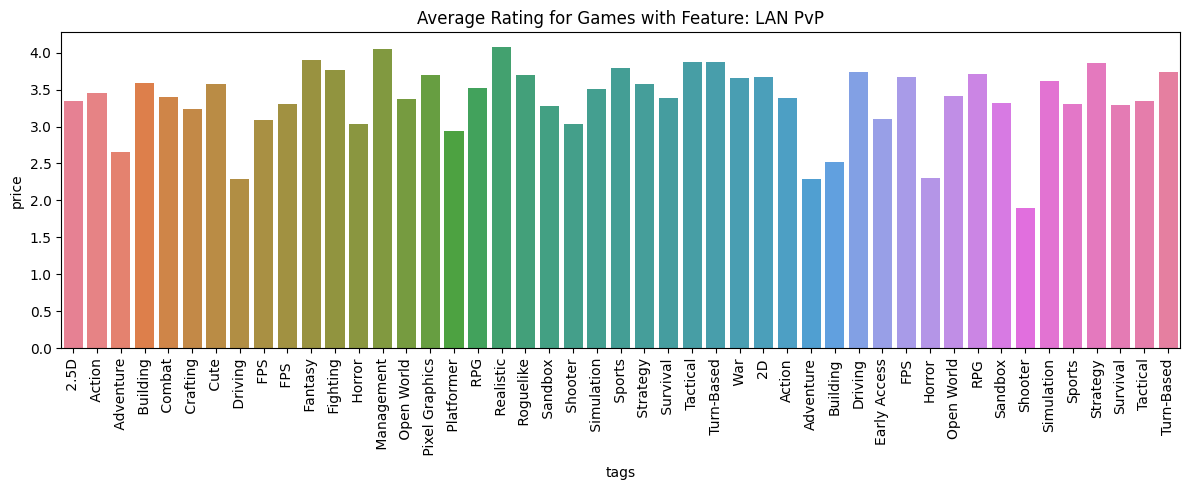

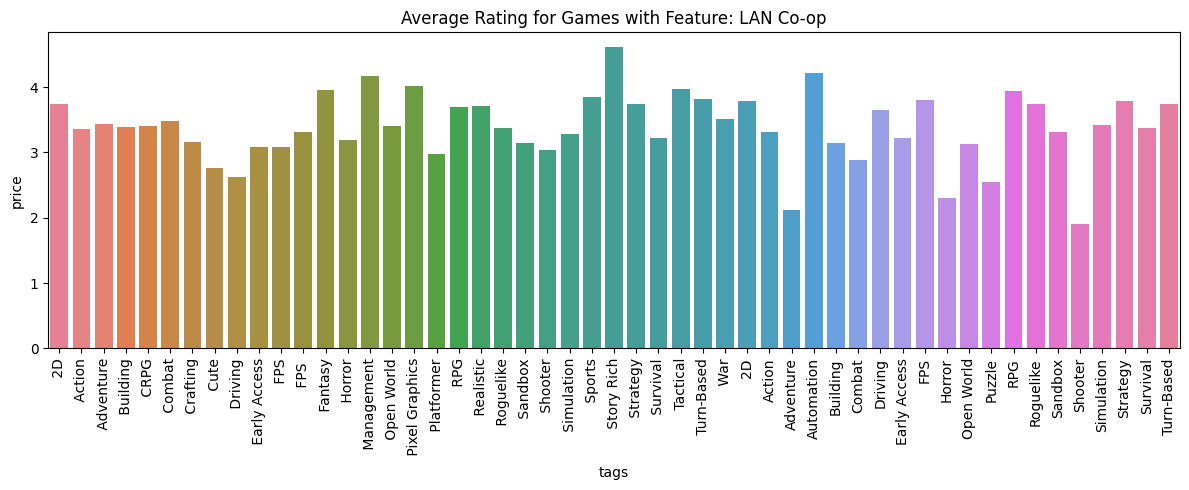

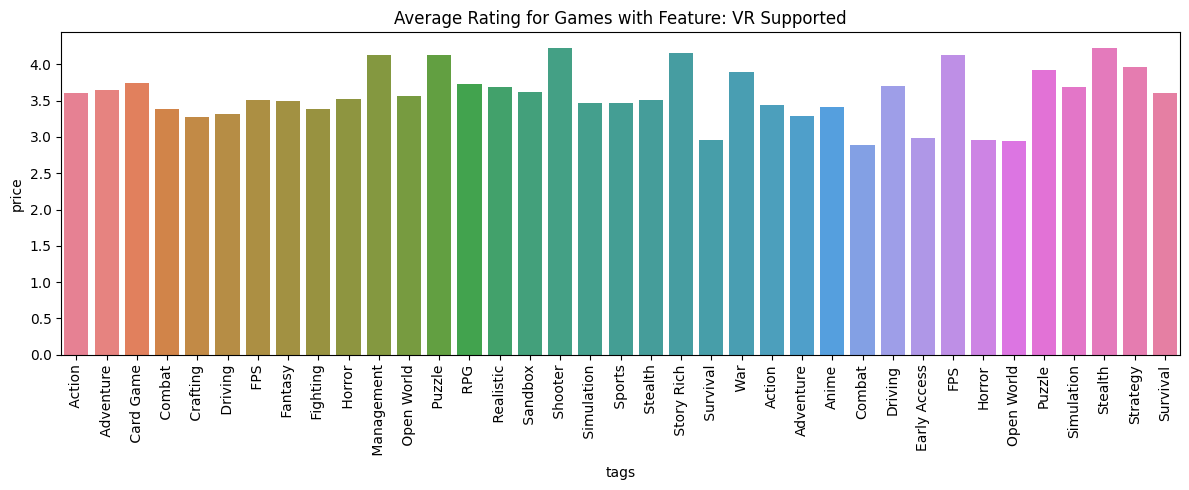

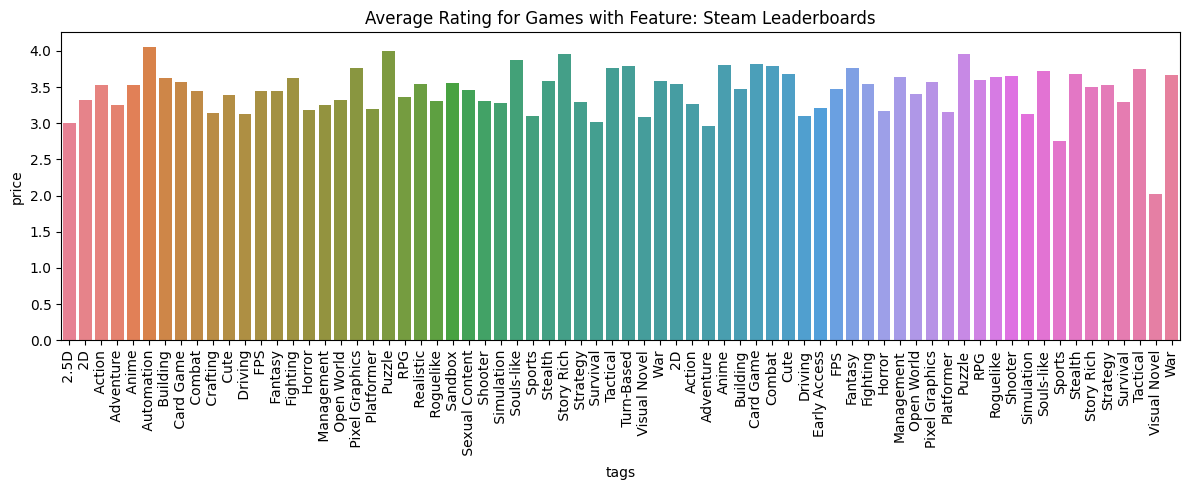

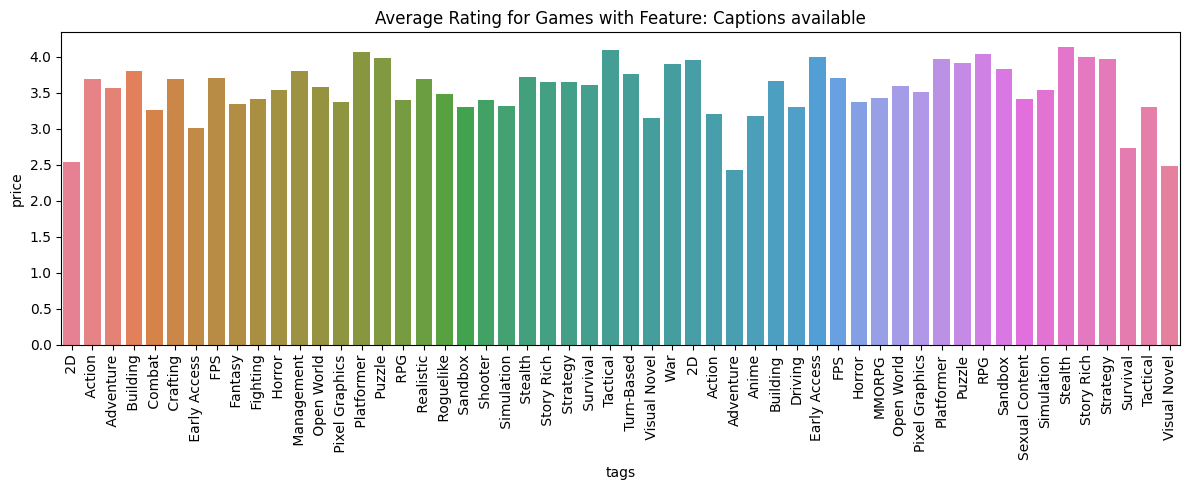

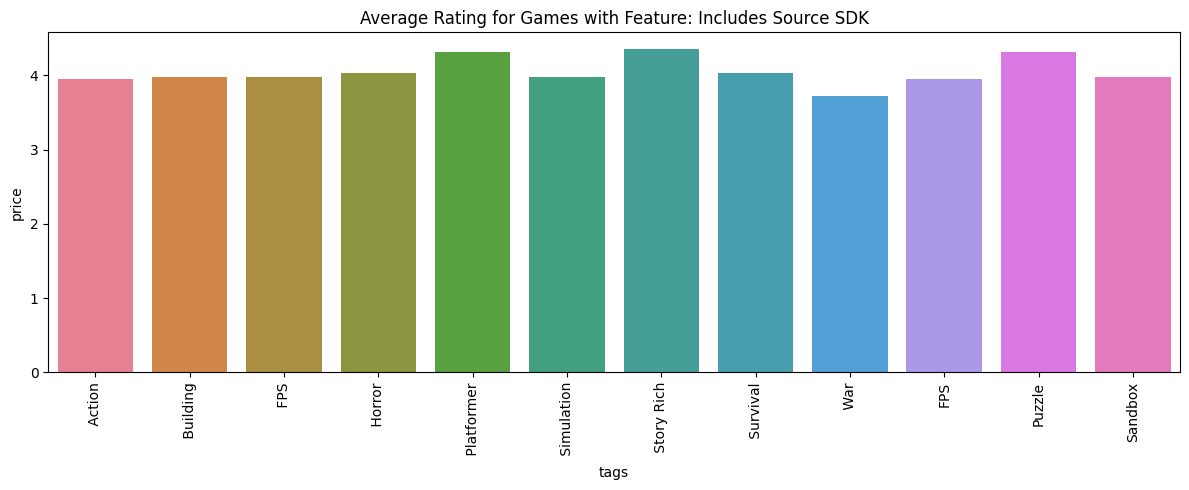

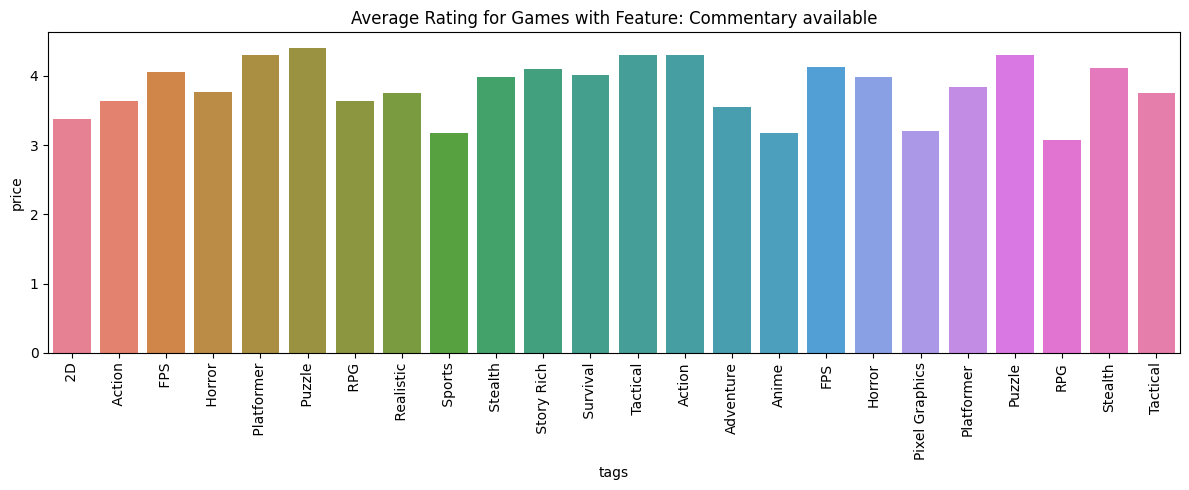

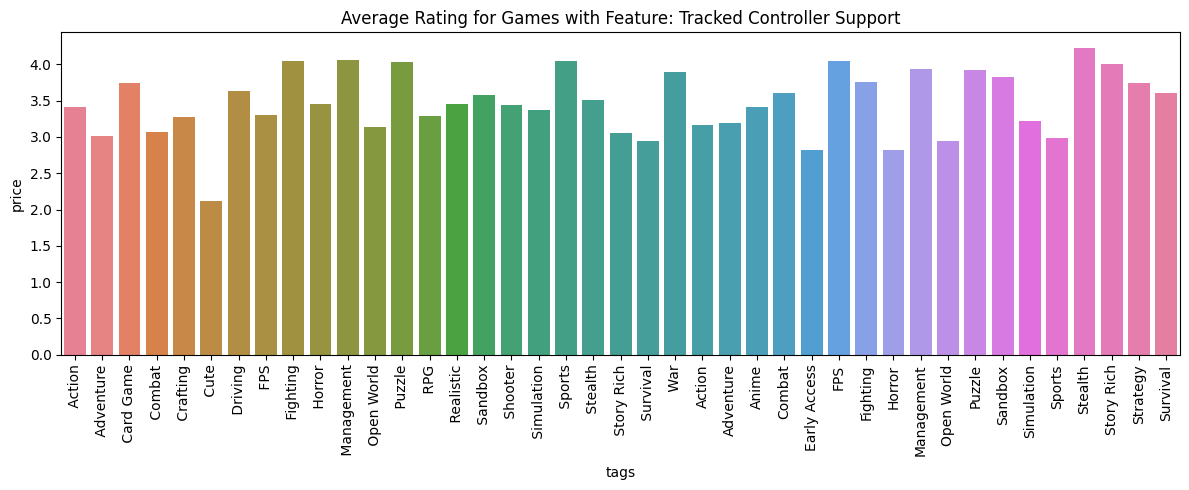

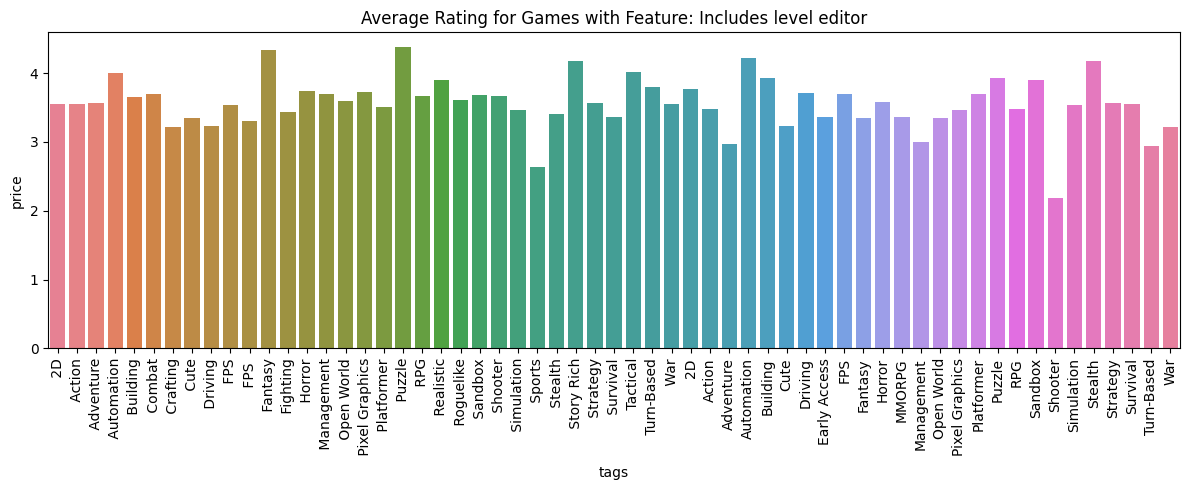

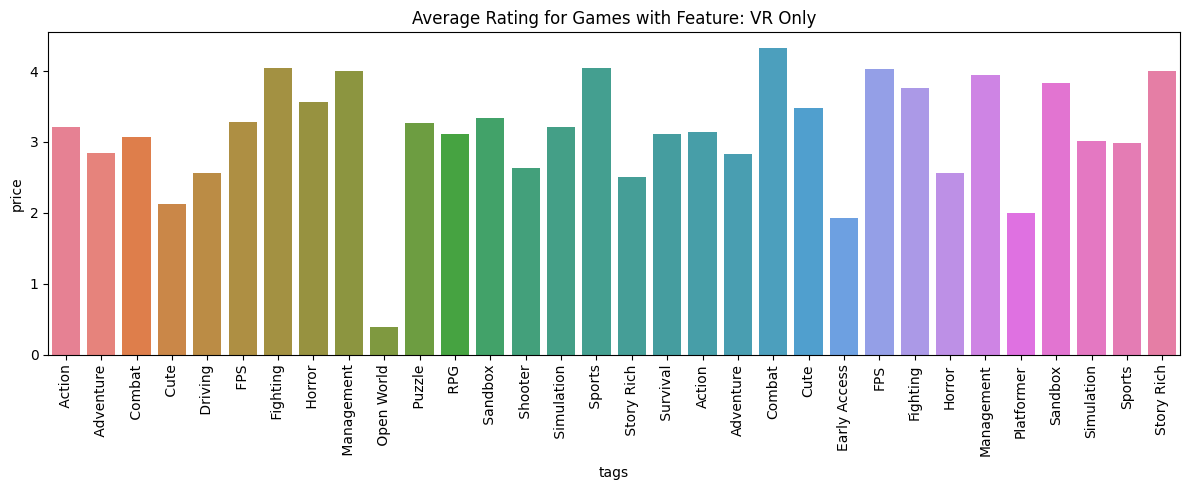

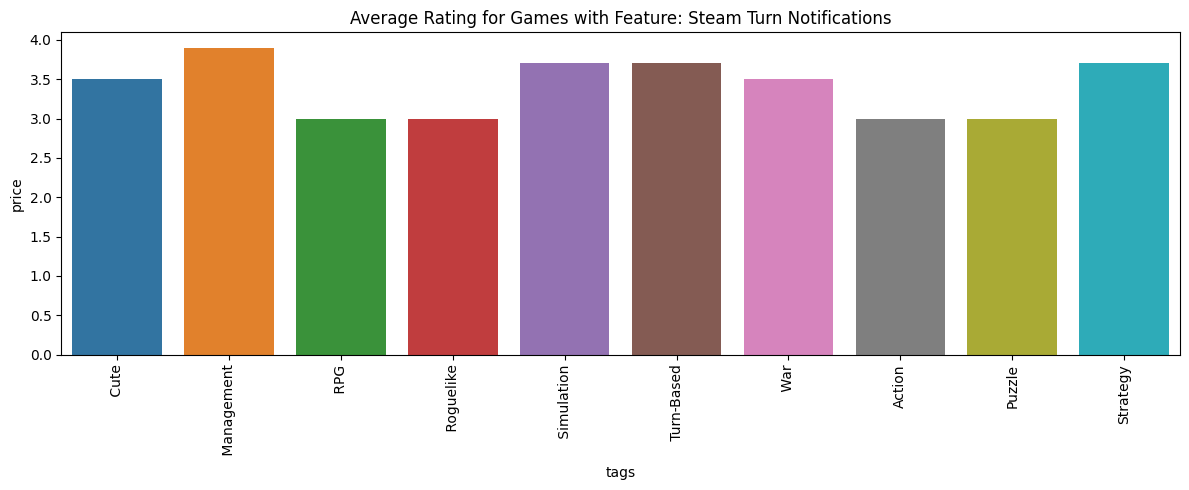

In [84]:
for col in feature_cols:
    df1 = df_with_price[df_with_price[col] == 1]
    df_char = df1.groupby("tags")["rating"].mean().to_frame("price").reset_index()


    plt.figure(figsize=(12, 5))
    sns.barplot(data=df_char, x="tags", y="price", hue='tags')
    plt.title(f"Average Rating for Games with Feature: {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()  